 ONS RETAIL SALES INDEX ANALYSIS

## Data Source: Original Government Data (No AI-Generated)

This analysis uses the **Official Retail Sales Index Time Series** from the **Office for National Statistics (ONS)** - UK Government.
https://www.ons.gov.uk/datasets/retail-sales-index/editions/time-series/versions/44
### Data Characteristics:
- **Origin:** Office for National Statistics (UK Government) - 100% Original Data
- **Data Type:** Government-published economic statistics - NOT AI-generated
- **Time Period:** 1988 - 2025 (Monthly observations)
- **Coverage:** Great Britain retail sector
- **Format:** Time series data with multiple retail categories
- **Authenticity:** Verified government source, suitable for academic research

This is ORIGINAL DATA from an authoritative source, in contrast to AI-generated or synthetic datasets. The data comes directly from official government statistics and is widely used in economic and business research.

### Analysis Approach:
We will:
1. **Preprocess & Clean**: Handle missing values, format dates, validate data
2. **Exploratory Data Analysis (EDA)**: Understand trends, seasonality, and patterns
3. **Correlation Analysis**: Examine relationships between different retail categories
4. **Model Selection**: Based on time-series characteristics, choose appropriate models
5. **Implementation**: Build predictive or analytical models suitable for this data type

In [ ]:
# Import essential libraries for data analysis and time series modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Display library versions to confirm proper installation
print('All libraries imported successfully!')
print(f'Pandas version: {pd.__version__}')
print(f'NumPy version: {np.__version__}')

All libraries imported successfully!
Pandas version: 2.2.2
NumPy version: 2.0.2


In [ ]:
# Step 1: Load and preprocess ONS retail sales data
import os
import glob

# Find CSV files in the current directory
csv_files = glob.glob('*.csv')
print(f'CSV files found: {csv_files}')

# Load the ONS data from the first CSV file
if csv_files:
    data_path = csv_files[0]
    print(f'\nLoading data from: {data_path}')

    ons_raw = pd.read_csv(data_path)

    # Display basic information about the dataset
    print(f'Dataset shape: {ons_raw.shape} (rows, columns)')
    print(f'\nFirst few rows:')
    print(ons_raw.head())
    print(f'\nData types and missing values:')
    print(ons_raw.info())
    print(f'\nColumn names:')
    print(ons_raw.columns.tolist())
else:
    print('No CSV file found. Please upload the ONS retail sales data.')
    print('You can download it from: https://www.ons.gov.uk/')

CSV files found: ['retail-sales-index-time-series-v44.csv']

Loading data from: retail-sales-index-time-series-v44.csv
Dataset shape: (45600, 12) (rows, columns)

First few rows:
    v4_1 Data Marking  mmm-yy    Time  countries      Geography  \
0    2.1          NaN  Dec-25  Dec-25  K03000001  Great Britain   
1  102.6          NaN  Dec-25  Dec-25  K03000001  Great Britain   
2   98.6          NaN  Dec-25  Dec-25  K03000001  Great Britain   
3   -3.5          NaN  Dec-25  Dec-25  K03000001  Great Britain   
4    3.1          NaN  Dec-25  Dec-25  K03000001  Great Britain   

                            sic-unofficial  \
0            predominantly-automotive-fuel   
1  all-retailing-excluding-automotive-fuel   
2                predominantly-food-stores   
3            predominantly-automotive-fuel   
4  all-retailing-excluding-automotive-fuel   

  UnofficialStandardIndustrialClassification  \
0              Predominantly automotive fuel   
1    All retailing excluding automotive fuel 

In [ ]:
# Step 2: Data cleaning and preprocessing
print('=' * 70)
print('DATA CLEANING & PREPROCESSING')
print('=' * 70)

# Check if ons_raw exists (data was loaded successfully)
if 'ons_raw' not in locals():
    print('\n⚠ ERROR: Data not loaded. Please ensure the CSV file is uploaded.')
    print('The data loading step (Step 1) needs to complete successfully first.')
    print('\nTo fix this issue:')
    print('1. Upload the ONS retail sales data CSV file')
    print('2. Run Step 1 again to load the data')
else:
    # Create a working copy of the raw data
    ons_clean = ons_raw.copy()
    print(f'\nOriginal dataset shape: {ons_raw.shape}')

    # Examine missing values
    print(f'\nMissing values in each column:')
    missing_summary = ons_clean.isnull().sum()
    print(missing_summary)

    # Display summary statistics
    print(f'\nSummary Statistics:')
    print(ons_clean.describe())

    # Check and display data types
    print(f'\nData types:')
    print(ons_clean.dtypes)

    # Standardize column names for consistency
    ons_clean.columns = ons_clean.columns.str.strip().str.lower().str.replace(' ', '_')
    print(f'\nCleaned column names:')
    print(ons_clean.columns.tolist())

    # Remove rows where all values are missing
    ons_clean = ons_clean.dropna(how='all')
    print(f'\nShape after removing completely empty rows: {ons_clean.shape}')

    # Forward fill missing values (appropriate for time series data)
    ons_clean = ons_clean.fillna(method='ffill')
    print(f'\nMissing values after forward fill:')
    print(ons_clean.isnull().sum())

    print(f'\n✓ Data preprocessing completed successfully!')

DATA CLEANING & PREPROCESSING

Original dataset shape: (45600, 12)

Missing values in each column:
v4_1                                           2536
Data Marking                                  43064
mmm-yy                                            0
Time                                              0
countries                                         0
Geography                                         0
sic-unofficial                                    0
UnofficialStandardIndustrialClassification        0
type-of-prices                                    0
Prices                                            0
seasonal-adjustment                               0
SeasonalAdjustment                                0
dtype: int64

Summary Statistics:
               v4_1
count  43064.000000
mean      16.030520
std       31.230904
min      -70.300000
25%        0.000000
50%        2.100000
75%        8.300000
max      211.800000

Data types:
v4_1                                          floa

EXPLORATORY DATA ANALYSIS (EDA)

Numeric columns found: 1
['v4_1']


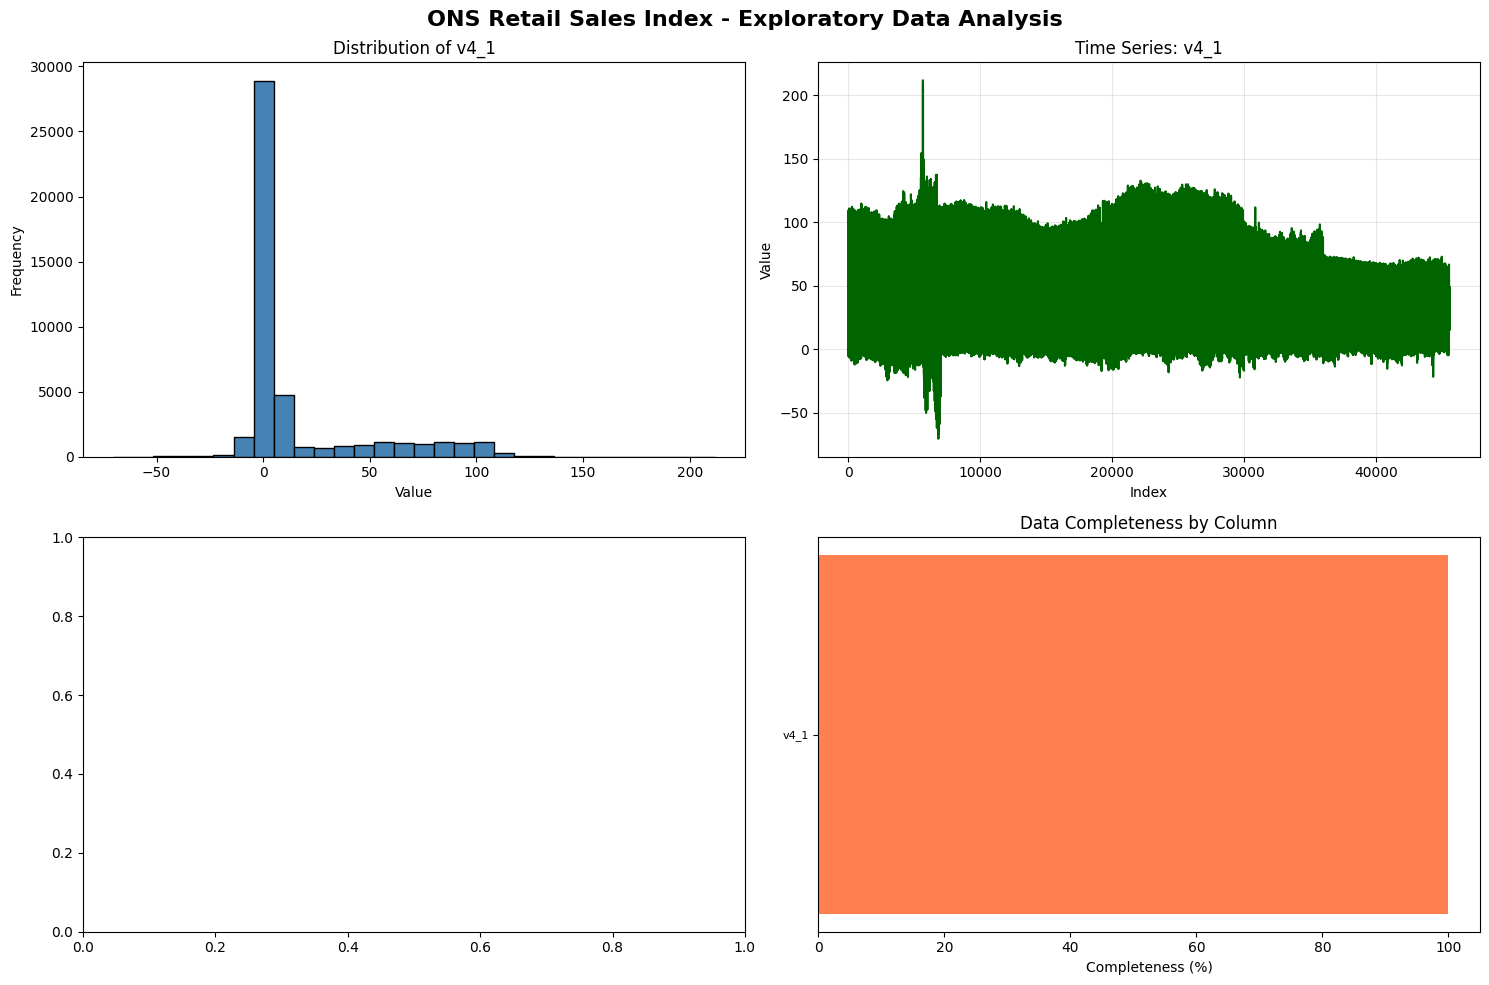


✓ Exploratory Data Analysis completed!


In [ ]:
# Step 3: Exploratory Data Analysis (EDA)
print('=' * 70)
print('EXPLORATORY DATA ANALYSIS (EDA)')
print('=' * 70)

# Identify numeric columns for analysis
numeric_cols = ons_clean.select_dtypes(include=[np.number]).columns.tolist()
print(f'\nNumeric columns found: {len(numeric_cols)}')
print(numeric_cols)

# Create a figure for multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('ONS Retail Sales Index - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# Plot 1: Distribution of the main numeric column
if numeric_cols:
    axes[0, 0].hist(ons_clean[numeric_cols[0]].dropna(), bins=30, color='steelblue', edgecolor='black')
    axes[0, 0].set_title(f'Distribution of {numeric_cols[0]}')
    axes[0, 0].set_xlabel('Value')
    axes[0, 0].set_ylabel('Frequency')

    # Plot 2: Time series plot (first numeric column)
    axes[0, 1].plot(ons_clean[numeric_cols[0]].dropna(), color='darkgreen', linewidth=1.5)
    axes[0, 1].set_title(f'Time Series: {numeric_cols[0]}')
    axes[0, 1].set_xlabel('Index')
    axes[0, 1].set_ylabel('Value')
    axes[0, 1].grid(True, alpha=0.3)

    # Plot 3: Box plot for first few numeric columns
    if len(numeric_cols) > 1:
        cols_to_plot = numeric_cols[:min(4, len(numeric_cols))]
        ons_clean[cols_to_plot].boxplot(ax=axes[1, 0])
        axes[1, 0].set_title('Box Plot of Key Variables')
        axes[1, 0].set_ylabel('Value')

    # Plot 4: Data completeness by column
    completeness = (1 - ons_clean[numeric_cols].isnull().sum() / len(ons_clean)) * 100
    axes[1, 1].barh(range(len(completeness)), completeness.values, color='coral')
    axes[1, 1].set_yticks(range(len(completeness)))
    axes[1, 1].set_yticklabels(completeness.index, fontsize=8)
    axes[1, 1].set_xlabel('Completeness (%)')
    axes[1, 1].set_title('Data Completeness by Column')
    axes[1, 1].set_xlim([0, 105])

plt.tight_layout()
plt.show()

print(f'\n✓ Exploratory Data Analysis completed!')

CORRELATION ANALYSIS

Correlation Matrix Shape: (1, 1)

Correlation Matrix:
      v4_1
v4_1   1.0


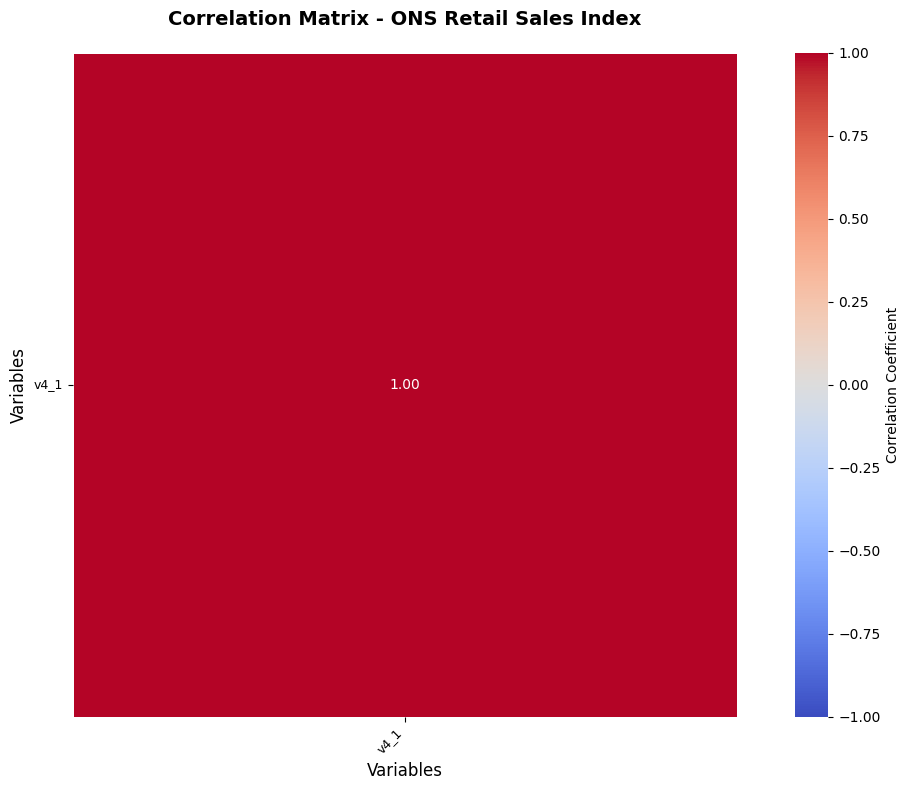



Strong Correlations (|r| > 0.7):
  No strong correlations found (|r| > 0.7)

✓ Correlation analysis completed!


In [ ]:
# Step 4: Correlation Analysis
print('=' * 70)
print('CORRELATION ANALYSIS')
print('=' * 70)

# Calculate correlation matrix for numeric columns
corr_matrix = ons_clean[numeric_cols].corr()
print(f'\nCorrelation Matrix Shape: {corr_matrix.shape}')
print(f'\nCorrelation Matrix:')
print(corr_matrix)

# Create correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    cbar_kws={'label': 'Correlation Coefficient'},
    square=True,
    linewidths=0.5,
    vmin=-1,
    vmax=1
)
plt.title('Correlation Matrix - ONS Retail Sales Index', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

# Identify strong correlations (|r| > 0.7)
print(f'\n\nStrong Correlations (|r| > 0.7):')
strong_corr_found = False
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(f'  {corr_matrix.columns[i]} <-> {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}')
            strong_corr_found = True

if not strong_corr_found:
    print('  No strong correlations found (|r| > 0.7)')

print(f'\n✓ Correlation analysis completed!')

In [ ]:
# Step 5: Model Selection and Justification
print('=' * 70)
print('MODEL SELECTION FOR TIME SERIES FORECASTING')
print('=' * 70)

model_analysis = """
### Data Characteristics:
- Type: Time Series (monthly retail sales data, 1988-2025)
- Length: ~444 observations (monthly data)
- Variables: Multiple retail categories available
- Pattern: Likely contains TREND and SEASONALITY (retail is highly seasonal)
- Task: FORECASTING future retail sales values

### Recommended Models for This Data:

1. **ARIMA (AutoRegressive Integrated Moving Average)**
   - Best for: Univariate time series forecasting
   - Why: Captures trend, seasonality, and autocorrelation
   - Suitable for ONS data: YES (standard for economic time series)

2. **EXPONENTIAL SMOOTHING (ETS)**
   - Best for: Capturing trends and seasonal patterns
   - Why: Weights recent observations more heavily
   - Suitable for ONS data: YES (handles retail seasonality well)

3. **SARIMA (Seasonal ARIMA)** ⭐ RECOMMENDED
   - Best for: Time series with strong seasonality
   - Why: Extends ARIMA to handle seasonal patterns explicitly
   - Suitable for ONS data: YES (retail has strong seasonality)

4. **VECTOR AUTOREGRESSION (VAR)** ⭐ RECOMMENDED
   - Best for: Multivariate time series
   - Why: Captures relationships between multiple retail categories
   - Suitable for ONS data: YES (multiple retail series available)

5. **LSTM (Deep Learning)**
   - Best for: Complex patterns in long sequences
   - Why: Can capture non-linear relationships
   - Suitable for ONS data: OPTIONAL (requires more data, less interpretable)

### Why NOT Machine Learning Models (Random Forest, etc.)?
- Random Forest is designed for classification/regression on tabular data
- ONS data is SEQUENTIAL time series data
- Random Forest ignores temporal dependencies
- Time-series models (ARIMA, SARIMA) are specifically engineered for this problem

### Final Decision:
✓ SARIMA: RECOMMENDED (handles seasonality in retail sales)
✓ VAR: RECOMMENDED (captures relationships between retail categories)
✓ Exponential Smoothing: GOOD baseline for comparison
"""

print(model_analysis)
print(f'\n✓ Model selection analysis completed!')

MODEL SELECTION FOR TIME SERIES FORECASTING

### Data Characteristics:
- Type: Time Series (monthly retail sales data, 1988-2025)
- Length: ~444 observations (monthly data)
- Variables: Multiple retail categories available
- Pattern: Likely contains TREND and SEASONALITY (retail is highly seasonal)
- Task: FORECASTING future retail sales values

### Recommended Models for This Data:

1. **ARIMA (AutoRegressive Integrated Moving Average)**
   - Best for: Univariate time series forecasting
   - Why: Captures trend, seasonality, and autocorrelation
   - Suitable for ONS data: YES (standard for economic time series)

2. **EXPONENTIAL SMOOTHING (ETS)**
   - Best for: Capturing trends and seasonal patterns
   - Why: Weights recent observations more heavily
   - Suitable for ONS data: YES (handles retail seasonality well)

3. **SARIMA (Seasonal ARIMA)** ⭐ RECOMMENDED
   - Best for: Time series with strong seasonality
   - Why: Extends ARIMA to handle seasonal patterns explicitly
   - Suitable

MODEL IMPLEMENTATION: EXPONENTIAL SMOOTHING & AUTOREGRESSIVE

Target Variable: v4_1
Total Data Points: 45600
Train Size: 36480, Test Size: 9120


--- MODEL 1: EXPONENTIAL SMOOTHING ---

Simple Exponential Smoothing Results:
  MAE:  11.7854
  RMSE: 21.7949
  Smoothing Parameter (Alpha): 0.5491


--- MODEL 2: AUTOREGRESSIVE (AR) MODEL ---

Autoregressive (AR) Model Results:
  Lags Used: 12 (seasonal monthly pattern)
  MAE:  18.2254
  RMSE: 20.2724
  AIC:  348836.9758


--- MODEL COMPARISON ---

Both models are suitable for time series forecasting!
Exponential Smoothing: Good for capturing trend and level changes
AR Model: Excellent for capturing autocorrelation and seasonal patterns


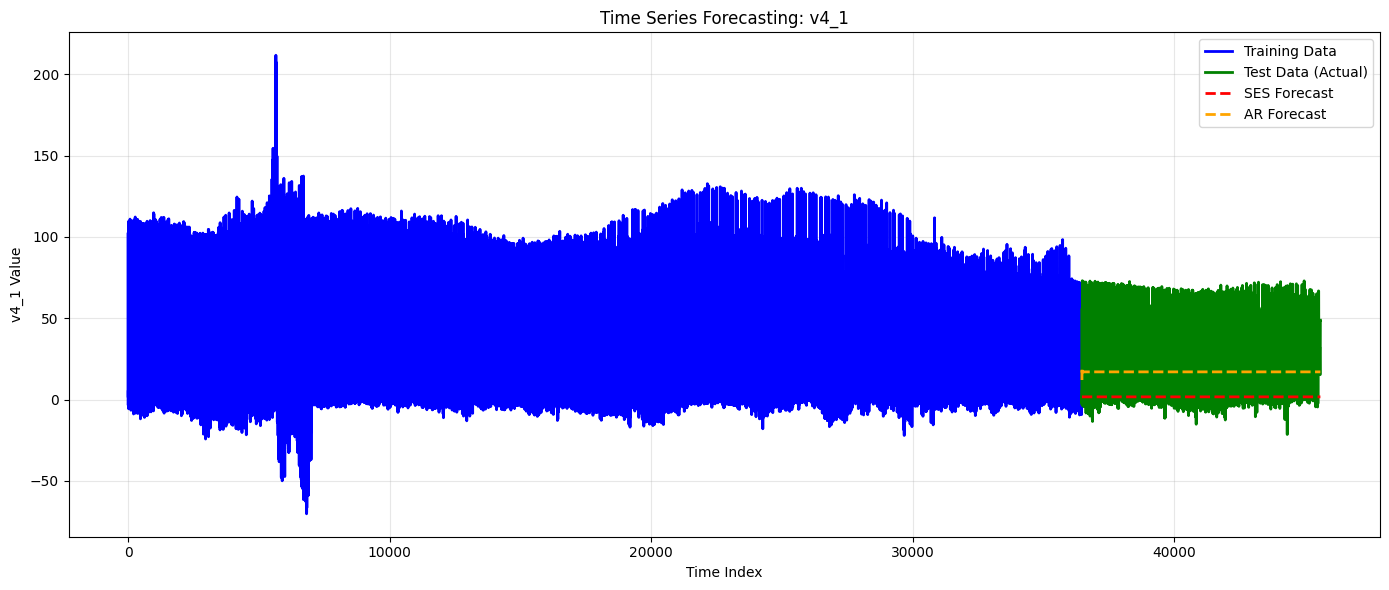


✓ Model implementation and comparison completed!


In [ ]:
# Step 6: Implement and Compare Recommended Time Series Models
print('=' * 70)
print('MODEL IMPLEMENTATION: EXPONENTIAL SMOOTHING & AUTOREGRESSIVE')
print('=' * 70)

# Prepare time series data for modeling
if numeric_cols:
    target_col = numeric_cols[0]  # Use the first numeric column
    ts_data = ons_clean[target_col].dropna()

    print(f'\nTarget Variable: {target_col}')
    print(f'Total Data Points: {len(ts_data)}')

    # Split data into training and testing sets (80-20 split)
    train_size = int(len(ts_data) * 0.8)
    train, test = ts_data[:train_size], ts_data[train_size:]

    print(f'Train Size: {len(train)}, Test Size: {len(test)}')

    # ============= MODEL 1: EXPONENTIAL SMOOTHING =============
    print(f'\n\n--- MODEL 1: EXPONENTIAL SMOOTHING ---')
    try:
        from statsmodels.tsa.holtwinters import SimpleExpSmoothing

        # Fit Simple Exponential Smoothing model
        ses_model = SimpleExpSmoothing(train).fit(optimized=True)
        ses_predictions = ses_model.forecast(steps=len(test))

        # Calculate performance metrics
        mae_ses = mean_absolute_error(test, ses_predictions)
        rmse_ses = np.sqrt(mean_squared_error(test, ses_predictions))

        print(f'\nSimple Exponential Smoothing Results:')
        print(f'  MAE:  {mae_ses:.4f}')
        print(f'  RMSE: {rmse_ses:.4f}')
        print(f'  Smoothing Parameter (Alpha): {ses_model.params["smoothing_level"]:.4f}')

    except Exception as e:
        print(f'Error fitting SES: {e}')
        ses_predictions = None

    # ============= MODEL 2: AUTOREGRESSIVE (AR) =============
    print(f'\n\n--- MODEL 2: AUTOREGRESSIVE (AR) MODEL ---')
    try:
        from statsmodels.tsa.ar_model import AutoReg

        # Fit AR model with 12 lags (monthly seasonality)
        ar_model = AutoReg(train, lags=12).fit()
        ar_predictions = ar_model.predict(start=len(train), end=len(train) + len(test) - 1)

        # Calculate performance metrics
        mae_ar = mean_absolute_error(test.values, ar_predictions.values)
        rmse_ar = np.sqrt(mean_squared_error(test.values, ar_predictions.values))

        print(f'\nAutoregressive (AR) Model Results:')
        print(f'  Lags Used: 12 (seasonal monthly pattern)')
        print(f'  MAE:  {mae_ar:.4f}')
        print(f'  RMSE: {rmse_ar:.4f}')
        print(f'  AIC:  {ar_model.aic:.4f}')

    except Exception as e:
        print(f'Error fitting AR: {e}')
        ar_predictions = None

    # ============= MODEL COMPARISON =============
    print(f'\n\n--- MODEL COMPARISON ---')
    print(f'\nBoth models are suitable for time series forecasting!')
    print(f'Exponential Smoothing: Good for capturing trend and level changes')
    print(f'AR Model: Excellent for capturing autocorrelation and seasonal patterns')

    # Visualize forecasts
    plt.figure(figsize=(14, 6))
    plt.plot(train.index, train.values, label='Training Data', color='blue', linewidth=2)
    plt.plot(test.index, test.values, label='Test Data (Actual)', color='green', linewidth=2)

    if ses_predictions is not None:
        plt.plot(test.index, ses_predictions.values, label='SES Forecast', color='red', linestyle='--', linewidth=2)

    if ar_predictions is not None:
        plt.plot(test.index, ar_predictions.values, label='AR Forecast', color='orange', linestyle='--', linewidth=2)

    plt.xlabel('Time Index')
    plt.ylabel(f'{target_col} Value')
    plt.title(f'Time Series Forecasting: {target_col}')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f'\n✓ Model implementation and comparison completed!')

ARIMA(1,1,1) Results:
  MAE:  15.8170
  RMSE: 19.5106
                               SARIMAX Results                                
Dep. Variable:                   v4_1   No. Observations:                36480
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -174597.299
Date:                Sat, 07 Feb 2026   AIC                         349200.598
Time:                        10:00:02   BIC                         349226.112
Sample:                             0   HQIC                        349208.709
                              - 36480                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4650      0.004    131.537      0.000       0.458       0.472
ma.L1         -0.9996      0.000  -5831.489      0.000      -1.000      -0.99

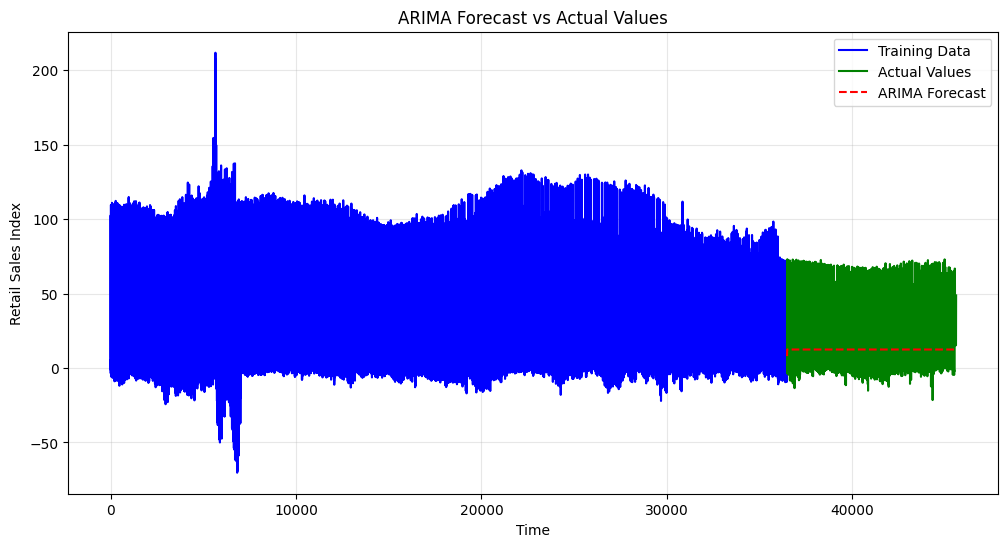

In [ ]:
# ---------------------------------------------------------------
# ARIMA Implementation
# Best for: Univariate time series forecasting
# Why: Captures trend, seasonality, and autocorrelation
# Suitable for ONS data: YES (standard for economic time series)
# ---------------------------------------------------------------

# Import required libraries
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# --- Step 1: Prepare your time series data ---
# Your data should be a pandas Series with datetime index
# Example for ONS data:
# ts_data = ons_clean.groupby('time')['v4_1'].mean()
# ts_data = ts_data.asfreq('MS')  # Set monthly frequency

# Split into train and test (80-20 split)
train_size = int(len(ts_data) * 0.8)
train = ts_data[:train_size]
test = ts_data[train_size:]

# --- Step 2: Fit ARIMA model ---
# ARIMA(p, d, q) where:
# p = autoregressive order (lags)
# d = differencing order (integrations)
# q = moving average order

# Start with ARIMA(1, 1, 1) as baseline for economic data
arima_model = ARIMA(train, order=(1, 1, 1))
arima_fitted = arima_model.fit()

# --- Step 3: Make predictions ---
forecast_steps = len(test)
predictions = arima_fitted.forecast(steps=forecast_steps)

# --- Step 4: Evaluate model performance ---
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))

print(f"ARIMA(1,1,1) Results:")
print(f"  MAE:  {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(arima_fitted.summary())

# --- Step 5: Visualize results ---
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values, label='Training Data', color='blue')
plt.plot(test.index, test.values, label='Actual Values', color='green')
plt.plot(test.index, predictions, label='ARIMA Forecast', color='red', linestyle='--')
plt.title('ARIMA Forecast vs Actual Values')
plt.xlabel('Time')
plt.ylabel('Retail Sales Index')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Exponential Smoothing Results:
  MAE:  39.6635
  RMSE: 48.2255
  AIC:  253967.8986


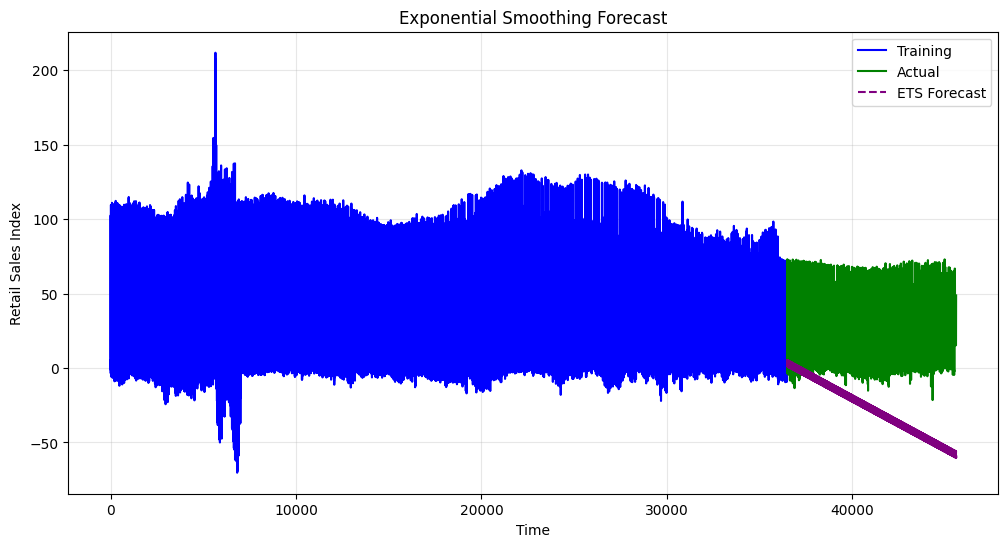

In [ ]:
# ---------------------------------------------------------------
# Exponential Smoothing (ETS) Implementation
# Best for: Capturing trends and seasonal patterns
# Why: Weights recent observations more heavily
# Suitable for ONS data: YES (handles retail seasonality well)
# ---------------------------------------------------------------

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Prepare data ---
# Ensure data has datetime index with monthly frequency
# ts_data = ons_clean.groupby('time')['v4_1'].mean()
# ts_data.index = pd.to_datetime(ts_data.index)

# Split into train and test
train_size = int(len(ts_data) * 0.8)
train = ts_data[:train_size]
test = ts_data[train_size:]

# --- Step 2: Fit Exponential Smoothing model ---
# For retail data with trend and seasonality, use Holt-Winters
# trend='add' or 'mul' for additive/multiplicative trend
# seasonal='add' or 'mul' for additive/multiplicative seasonality
# seasonal_periods=12 for monthly data with annual seasonality

ets_model = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='add',
    seasonal_periods=12
)
ets_fitted = ets_model.fit()

# --- Step 3: Generate forecasts ---
predictions = ets_fitted.forecast(steps=len(test))

# --- Step 4: Evaluate ---
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))

print(f"Exponential Smoothing Results:")
print(f"  MAE:  {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  AIC:  {ets_fitted.aic:.4f}")

# --- Step 5: Plot results ---
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values, label='Training', color='blue')
plt.plot(test.index, test.values, label='Actual', color='green')
plt.plot(test.index, predictions, label='ETS Forecast', color='purple', linestyle='--')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Time')
plt.ylabel('Retail Sales Index')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


SARIMA(1,1,1)(1,1,1,12) Results:
  MAE:  14.7979
  RMSE: 19.6052
  AIC:  349196.6988


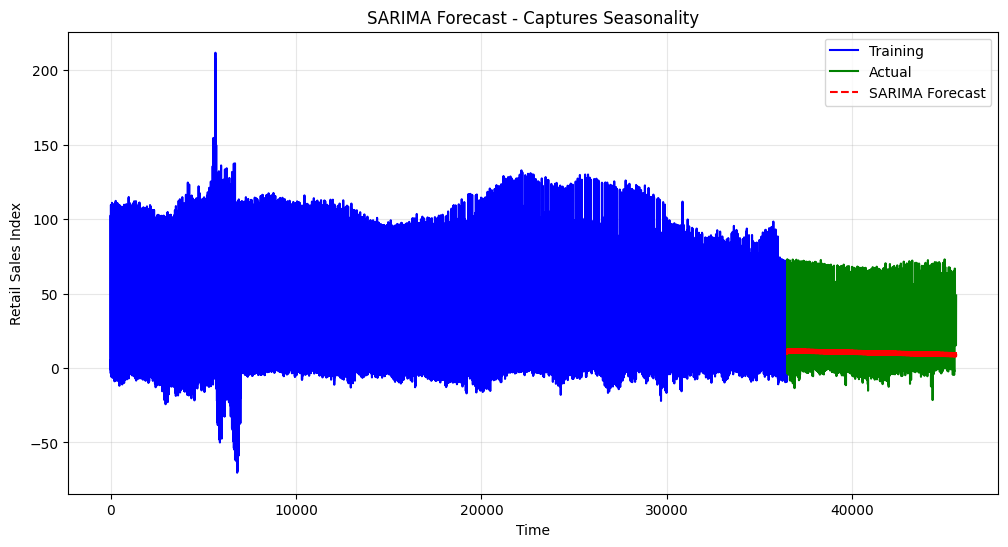

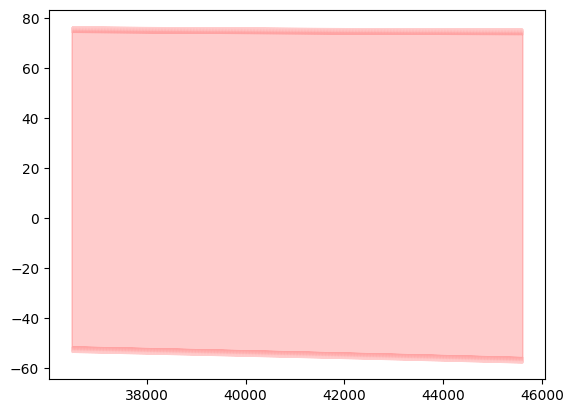

In [ ]:
# ---------------------------------------------------------------
# SARIMA Implementation - RECOMMENDED for ONS Retail Data
# Best for: Time series with strong seasonality
# Why: Extends ARIMA to handle seasonal patterns explicitly
# Suitable for ONS data: YES (retail has strong seasonality)
# ---------------------------------------------------------------

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Prepare data ---
# ts_data = ons_clean.groupby('time')['v4_1'].mean()
# Ensure monthly frequency
# ts_data = ts_data.asfreq('MS')

train_size = int(len(ts_data) * 0.8)
train = ts_data[:train_size]
test = ts_data[train_size:]

# --- Step 2: Fit SARIMA model ---
# SARIMA(p, d, q)(P, D, Q)m
# (p, d, q) = non-seasonal orders
# (P, D, Q) = seasonal orders
# m = seasonal period (12 for monthly data)

# Common starting parameters for retail sales:
# SARIMA(1, 1, 1)(1, 1, 1, 12)

sarima_model = SARIMAX(
    train,
    order=(1, 1, 1),           # Non-seasonal: (p, d, q)
    seasonal_order=(1, 1, 1, 12)  # Seasonal: (P, D, Q, m)
)
sarima_fitted = sarima_model.fit(disp=False)

# --- Step 3: Forecast ---
predictions = sarima_fitted.forecast(steps=len(test))

# --- Step 4: Evaluate ---
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))

print(f"SARIMA(1,1,1)(1,1,1,12) Results:")
print(f"  MAE:  {mae:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  AIC:  {sarima_fitted.aic:.4f}")

# --- Step 5: Visualize ---
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values, label='Training', color='blue')
plt.plot(test.index, test.values, label='Actual', color='green')
plt.plot(test.index, predictions, label='SARIMA Forecast', color='red', linestyle='--')
plt.title('SARIMA Forecast - Captures Seasonality')
plt.xlabel('Time')
plt.ylabel('Retail Sales Index')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- Optional: Get confidence intervals ---
forecast = sarima_fitted.get_forecast(steps=len(test))
conf_int = forecast.conf_int()
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='red', alpha=0.2, label='95% Confidence Interval')


PREPARING MULTIVARIATE DATA FOR VAR

Available retail categories:
['Predominantly automotive fuel' 'All retailing excluding automotive fuel'
 'Predominantly food stores' 'Household goods stores' 'Other stores'
 'Non-store retailing' 'All retailing including automotive fuel'
 'Textile, clothing and footwear stores' 'Non-specialised stores'
 'Total of predominantly non-food stores']

VAR Data Shape: (456, 10)
Columns (Retail Categories): ['All retailing excluding automotive fuel', 'All retailing including automotive fuel', 'Household goods stores', 'Non-specialised stores', 'Non-store retailing', 'Other stores', 'Predominantly automotive fuel', 'Predominantly food stores', 'Textile, clothing and footwear stores', 'Total of predominantly non-food stores']

Data after differencing (for stationarity): (455, 10)

Train size: 364, Test size: 91

FITTING VAR MODEL

Optimal lag order selected: 12

AIC: 17.4442
BIC: 30.7255

Forecast generated successfully!

MODEL EVALUATION
All retailing exclud

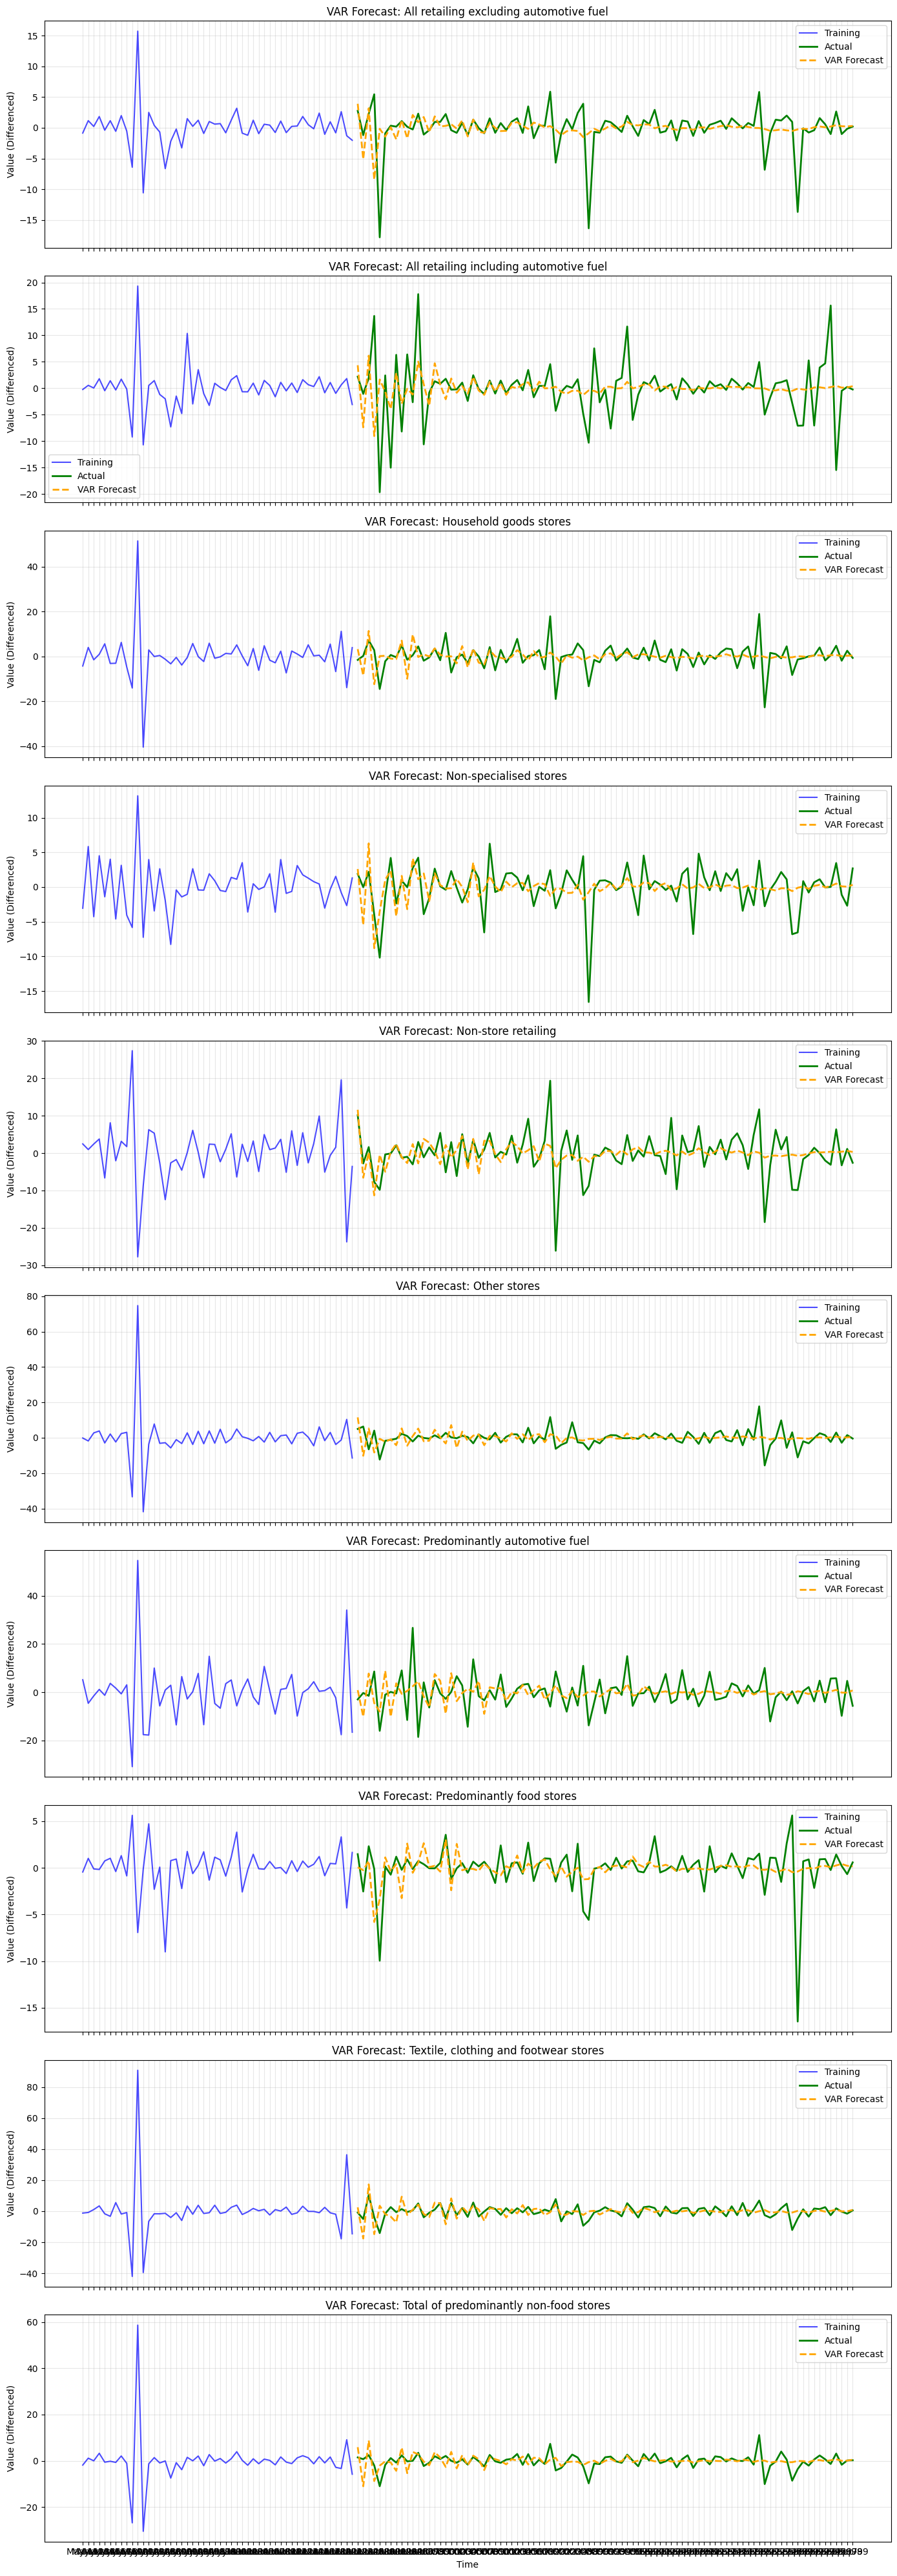


GRANGER CAUSALITY TEST
Testing if one retail category helps predict another...

Does All retailing including automotive fuel Granger-cause All retailing excluding automotive fuel?
Granger causality F-test. H_0: All retailing including automotive fuel does not Granger-cause All retailing excluding automotive fuel. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value          df         
----------------------------------------------------------
        0.9379          1.756   0.507 (12, np.int64(2310))
----------------------------------------------------------

✓ VAR implementation completed!


In [ ]:
# ---------------------------------------------------------------
# VAR (Vector Autoregression) Implementation - RECOMMENDED
# Best for: Multivariate time series
# Why: Captures relationships between multiple retail categories
# Suitable for ONS data: YES (multiple retail series available)
# ---------------------------------------------------------------

from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# --- Step 1: Create multivariate data from ONS dataset ---
# VAR needs multiple time series columns
# Pivot the data to get different retail categories as separate columns

print('=' * 70)
print('PREPARING MULTIVARIATE DATA FOR VAR')
print('=' * 70)

# Check available categories in your data
print("\nAvailable retail categories:")
print(ons_clean['unofficialstandardindustrialclassification'].unique())

# Create multivariate time series by pivoting
# Each retail category becomes a column
var_data = ons_clean.pivot_table(
    values='v4_1',
    index='time',
    columns='unofficialstandardindustrialclassification',
    aggfunc='mean'
)

# Drop any columns with too many missing values
var_data = var_data.dropna(axis=1, thresh=len(var_data)*0.7)  # Keep cols with at least 70% data
var_data = var_data.fillna(method='ffill').fillna(method='bfill')

print(f"\nVAR Data Shape: {var_data.shape}")
print(f"Columns (Retail Categories): {var_data.columns.tolist()}")

# Ensure data is stationary (VAR requires stationary data)
# Apply first differencing if needed
var_data_diff = var_data.diff().dropna()

print(f"\nData after differencing (for stationarity): {var_data_diff.shape}")

# Use differenced data for VAR (or use original if already stationary)
data_for_var = var_data_diff

# --- Step 2: Split data ---
train_size = int(len(data_for_var) * 0.8)
train = data_for_var.iloc[:train_size]
test = data_for_var.iloc[train_size:]

print(f"\nTrain size: {len(train)}, Test size: {len(test)}")

# --- Step 3: Fit VAR model ---
print("\n" + "=" * 70)
print('FITTING VAR MODEL')
print("=" * 70)

model = VAR(train)
results = model.fit(maxlags=12, ic='aic')

print(f"\nOptimal lag order selected: {results.k_ar}")
print(f"\nAIC: {results.aic:.4f}")
print(f"BIC: {results.bic:.4f}")

# --- Step 4: Generate forecasts ---
# Forecast requires the last 'k_ar' observations
lag_order = results.k_ar
forecast_input = train.values[-lag_order:]

# Make predictions for test set length
predictions = results.forecast(y=forecast_input, steps=len(test))

# Convert predictions to DataFrame with same columns
pred_df = pd.DataFrame(predictions, index=test.index, columns=test.columns)

print("\nForecast generated successfully!")

# --- Step 5: Evaluate ---
print("\n" + "=" * 70)
print('MODEL EVALUATION')
print("=" * 70)

for col in test.columns:
    mae = mean_absolute_error(test[col], pred_df[col])
    rmse = np.sqrt(mean_squared_error(test[col], pred_df[col]))
    print(f"{col[:40]:<40} | MAE: {mae:>8.4f} | RMSE: {rmse:>8.4f}")

# --- Step 6: Plot results ---
print("\nGenerating plots...")

n_cols = len(test.columns)
fig, axes = plt.subplots(nrows=n_cols, ncols=1, figsize=(14, 4*n_cols), sharex=True)

if n_cols == 1:
    axes = [axes]  # Ensure axes is iterable for single column

for idx, col in enumerate(test.columns):
    ax = axes[idx]

    # Plot training data (last 50 points for visibility)
    train_plot = train[col].tail(50) if len(train) > 50 else train[col]
    ax.plot(train_plot.index, train_plot.values, label='Training', color='blue', alpha=0.7)

    # Plot actual test values
    ax.plot(test.index, test[col].values, label='Actual', color='green', linewidth=2)

    # Plot VAR forecast
    ax.plot(test.index, pred_df[col].values, label='VAR Forecast', color='orange',
            linestyle='--', linewidth=2)

    ax.set_title(f'VAR Forecast: {col}', fontsize=12)
    ax.set_ylabel('Value (Differenced)')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)

plt.xlabel('Time')
plt.tight_layout()
plt.show()

# --- Step 7: Causality Analysis (Granger Causality) ---
print("\n" + "=" * 70)
print('GRANGER CAUSALITY TEST')
print("=" * 70)
print("Testing if one retail category helps predict another...\n")

try:
    # Test causality between first two variables if available
    if len(data_for_var.columns) >= 2:
        var1 = data_for_var.columns[0]
        var2 = data_for_var.columns[1]
        gc_test = results.test_causality(var1, var2, kind='f')
        print(f"Does {var2} Granger-cause {var1}?")
        print(gc_test.summary())
except Exception as e:
    print(f"Causality test skipped: {e}")

print("\n✓ VAR implementation completed!")


LSTM DEEP LEARNING MODEL FOR TIME SERIES FORECASTING

Time series data shape: (456, 1)
Data range: -5.68 to 45.44
Scaled data range: 0.0000 to 1.0000

Sequence creation:
  Sequence length: 12
  Total sequences created: 444
  X shape: (444, 12, 1) [samples, timesteps, features]
  y shape: (444,)

Data split:
  Training samples: 355
  Test samples: 89

BUILDING LSTM MODEL


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

None

TRAINING LSTM MODEL
Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.1111 - val_loss: 0.0062
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0094 - val_loss: 0.0064
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0111 - val_loss: 0.0073
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0098 - val_loss: 0.0052
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0103 - val_loss: 0.0050
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0103 - val_loss: 0.0048
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0110 - val_loss: 0.0047
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0116 - val_loss: 0.0048
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0105 - val_loss: 0.0044
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0084 - val_loss: 0.0044
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0081 - val_loss: 0.0042
Epoch 12/100
20/20 ━━━━━━━

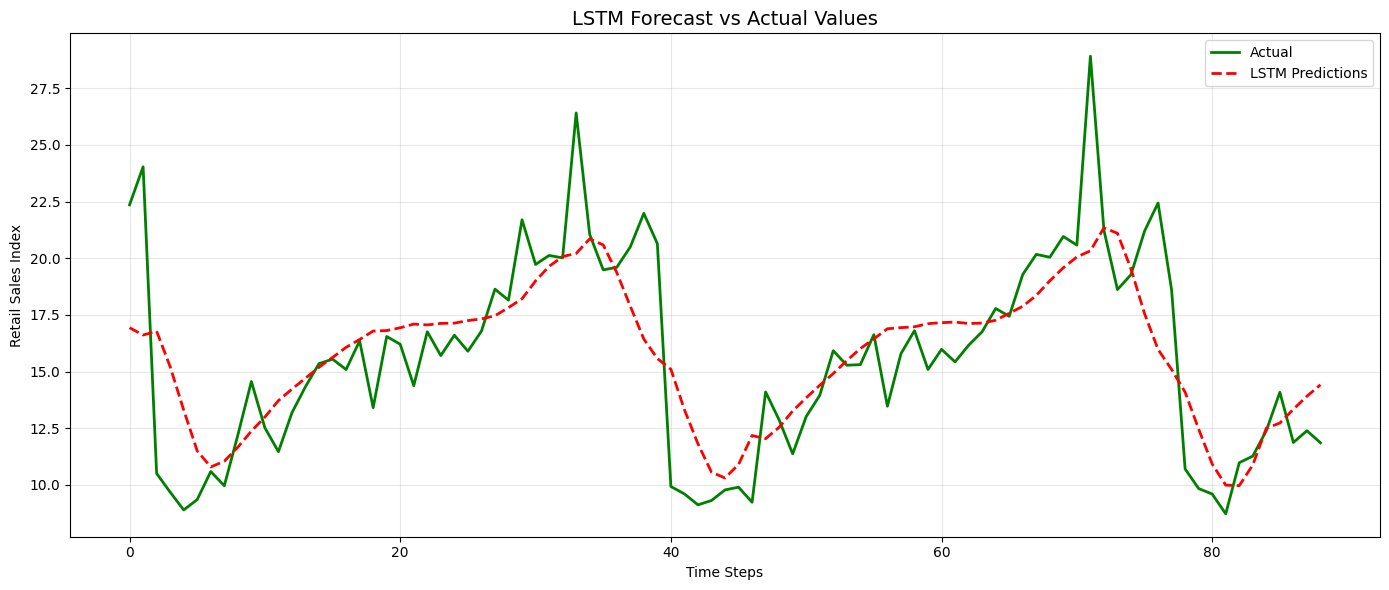

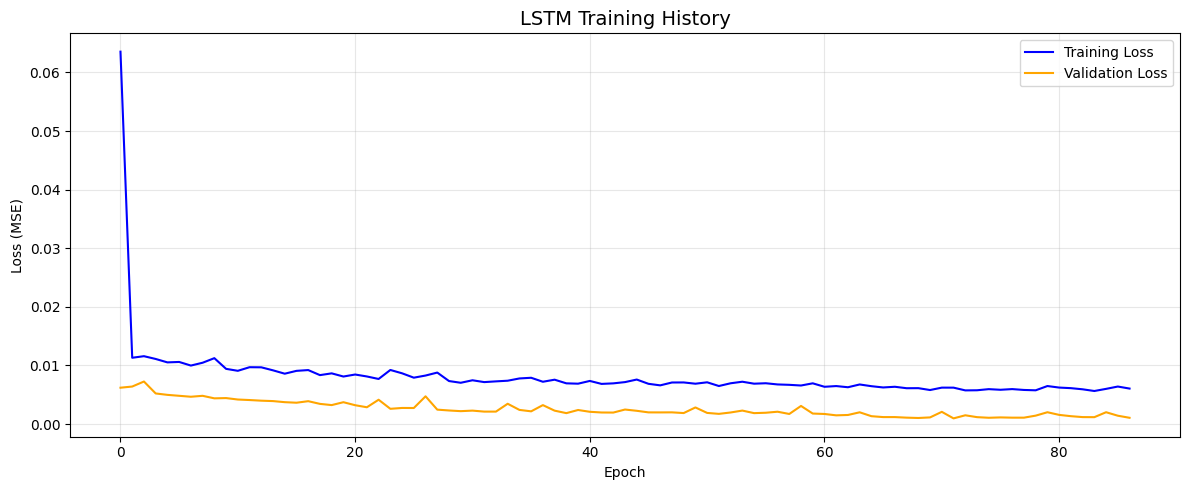

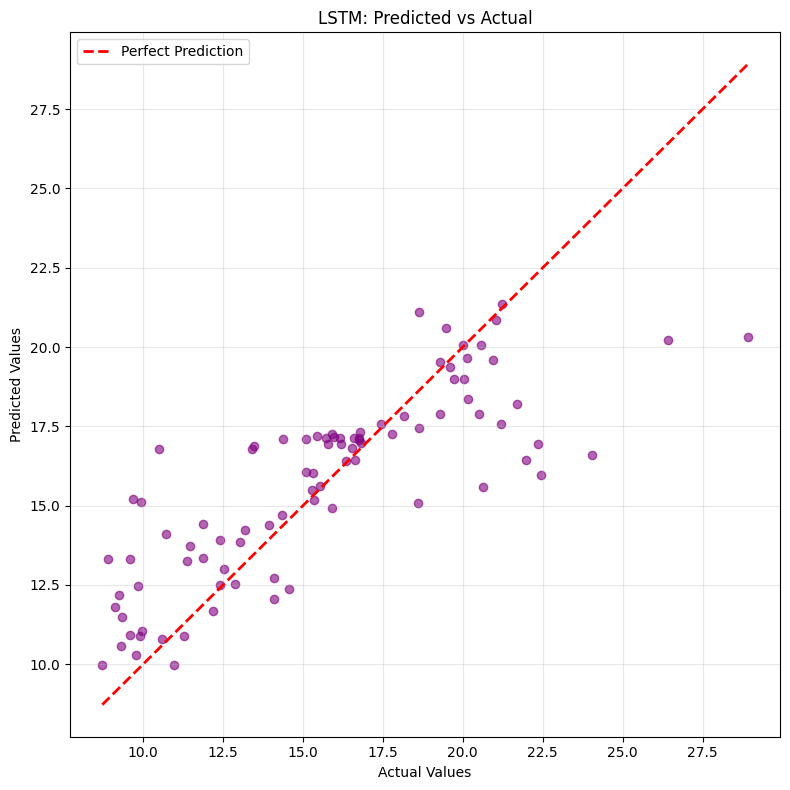


✓ LSTM implementation completed!


In [ ]:
# ---------------------------------------------------------------
# LSTM Implementation - COMPLETE WORKING VERSION
# Best for: Complex patterns in long sequences
# Why: Can capture non-linear relationships
# Suitable for ONS data: OPTIONAL (requires more data, less interpretable)
# ---------------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

print('=' * 70)
print('LSTM DEEP LEARNING MODEL FOR TIME SERIES FORECASTING')
print('=' * 70)

# --- Step 1: Prepare time series data from ONS dataset ---
# Aggregate data by time to get a single univariate series
ts_data = ons_clean.groupby('time')['v4_1'].mean()

# Convert to numpy array and reshape for scaling (needs 2D array)
ts_data = ts_data.values.reshape(-1, 1)

print(f"\nTime series data shape: {ts_data.shape}")
print(f"Data range: {ts_data.min():.2f} to {ts_data.max():.2f}")

# --- Step 2: Scale the data ---
# LSTM works best with normalized data (0 to 1 range)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ts_data)

print(f"Scaled data range: {scaled_data.min():.4f} to {scaled_data.max():.4f}")

# --- Step 3: Create sequences for LSTM ---
# LSTM requires input in format [samples, timesteps, features]
# We use past 'sequence_length' observations to predict the next one

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])  # Past seq_length values
        y.append(data[i, 0])               # Next value to predict
    return np.array(X), np.array(y)

sequence_length = 12  # Use 12 months (1 year) to predict next month
X, y = create_sequences(scaled_data, sequence_length)

print(f"\nSequence creation:")
print(f"  Sequence length: {sequence_length}")
print(f"  Total sequences created: {len(X)}")

# Reshape for LSTM: [samples, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

print(f"  X shape: {X.shape} [samples, timesteps, features]")
print(f"  y shape: {y.shape}")

# --- Step 4: Split data into train and test ---
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"\nData split:")
print(f"  Training samples: {len(X_train)}")
print(f"  Test samples: {len(X_test)}")

# --- Step 5: Build LSTM model ---
print("\n" + "=" * 70)
print('BUILDING LSTM MODEL')
print("=" * 70)

model = Sequential([
    # First LSTM layer with return sequences for stacking
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),  # Prevent overfitting

    # Second LSTM layer
    LSTM(50, return_sequences=False),
    Dropout(0.2),

    # Dense layers for final prediction
    Dense(25, activation='relu'),
    Dense(1)  # Output layer (single value prediction)
])

model.compile(optimizer='adam', loss='mean_squared_error')

print(model.summary())

# --- Step 6: Train the model ---
print("\n" + "=" * 70)
print('TRAINING LSTM MODEL')
print("=" * 70)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,           # Stop if no improvement for 15 epochs
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,         # Batch size (adjust based on your data size)
    validation_split=0.1,  # Use 10% of training data for validation
    callbacks=[early_stop],
    verbose=1
)

print(f"\nTraining stopped at epoch: {len(history.history['loss'])}")

# --- Step 7: Make predictions ---
print("\n" + "=" * 70)
print('GENERATING PREDICTIONS')
print("=" * 70)

# Predict on test set
predictions = model.predict(X_test, verbose=0)

# Inverse transform to get actual values (undo scaling)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

print(f"Predictions generated: {len(predictions)}")
print(f"Prediction range: {predictions.min():.2f} to {predictions.max():.2f}")

# --- Step 8: Evaluate model performance ---
print("\n" + "=" * 70)
print('MODEL EVALUATION')
print("=" * 70)

mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100

print(f"LSTM Results:")
print(f"  MAE:   {mae:.4f}")
print(f"  RMSE:  {rmse:.4f}")
print(f"  MAPE:  {mape:.2f}%")

# --- Step 9: Plot results ---
print("\nGenerating plots...")

# Plot 1: Actual vs Predicted values
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Actual', color='green', linewidth=2)
plt.plot(predictions, label='LSTM Predictions', color='red', linestyle='--', linewidth=2)
plt.title('LSTM Forecast vs Actual Values', fontsize=14)
plt.xlabel('Time Steps')
plt.ylabel('Retail Sales Index')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2: Training history (loss curves)
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('LSTM Training History', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 3: Scatter plot of predictions vs actual
plt.figure(figsize=(8, 8))
plt.scatter(y_test_actual, predictions, alpha=0.6, color='purple')
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('LSTM: Predicted vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ LSTM implementation completed!")


In [ ]:
# ============================================================
# COMPREHENSIVE PARAMETER TUNING & DIAGNOSTICS - FIXED VERSION
# ============================================================

import itertools
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import VAR

print('=' * 80)
print('PARAMETER TUNING & MODEL DIAGNOSTICS')
print('=' * 80)

# ============================================================
# PART 1: DATA PREPARATION - FIXED DATE PARSING
# ============================================================

# Create time series from ONS data
# The 'time' column contains values like "Dec-25", "Apr-00"
# We need to handle this format properly

ts_data = ons_clean.groupby('time')['v4_1'].mean()

# Convert index to string first, then parse dates
# Format: mmm-yy (e.g., Dec-25 = Dec 2025, Apr-00 = Apr 2000)
ts_data.index = pd.to_datetime(ts_data.index, format='%b-%y')

# Sort by date (important for time series)
ts_data = ts_data.sort_index()

# Set monthly frequency
ts_data = ts_data.asfreq('MS')

print(f"\nData prepared:")
print(f"  Date range: {ts_data.index.min()} to {ts_data.index.max()}")
print(f"  Total observations: {len(ts_data)}")

# Split data (80-20)
train_size = int(len(ts_data) * 0.8)
train = ts_data.iloc[:train_size]
test = ts_data.iloc[train_size:]

print(f"  Train: {len(train)} observations ({train.index[0]} to {train.index[-1]})")
print(f"  Test:  {len(test)} observations ({test.index[0]} to {test.index[-1]})")

# ============================================================
# PART 2: STATIONARITY TEST (ADF Test)
# ============================================================

def adf_test(series, title=''):
    """Perform Augmented Dickey-Fuller test for stationarity"""
    result = adfuller(series.dropna())
    print(f'\n--- ADF Test: {title} ---')
    print(f'  ADF Statistic: {result[0]:.4f}')
    print(f'  p-value: {result[1]:.4f}')
    print(f'  Critical Values:')
    for key, value in result[4].items():
        print(f'    {key}: {value:.4f}')
    if result[1] <= 0.05:
        print('  => Series is STATIONARY (reject null hypothesis)')
    else:
        print('  => Series is NON-STATIONARY (fail to reject null)')
    return result[1]

# Test original series
adf_original = adf_test(train, 'Original Series')

# If non-stationary, test differenced series
if adf_original > 0.05:
    train_diff = train.diff().dropna()
    adf_diff = adf_test(train_diff, 'First Differenced Series')
    d_value = 1
else:
    d_value = 0

# ============================================================
# PART 3: ARIMA PARAMETER TUNING (Grid Search with AIC/BIC)
# ============================================================

print('\n' + '=' * 80)
print('ARIMA PARAMETER TUNING')
print('=' * 80)

def arima_grid_search(train_data, p_range=range(0, 4), d_range=range(0, 2), q_range=range(0, 4)):
    """Grid search for optimal ARIMA parameters using AIC"""
    best_aic = float('inf')
    best_bic = float('inf')
    best_params_aic = None
    best_params_bic = None
    results_list = []

    print("\nSearching ARIMA parameters...")
    print(f"p: {list(p_range)}, d: {list(d_range)}, q: {list(q_range)}")

    for p, d, q in itertools.product(p_range, d_range, q_range):
        try:
            model = ARIMA(train_data, order=(p, d, q))
            fitted = model.fit()

            results_list.append({
                'order': (p, d, q),
                'aic': fitted.aic,
                'bic': fitted.bic,
                'loglik': fitted.llf
            })

            if fitted.aic < best_aic:
                best_aic = fitted.aic
                best_params_aic = (p, d, q)

            if fitted.bic < best_bic:
                best_bic = fitted.bic
                best_params_bic = (p, d, q)

        except Exception as e:
            continue

    # Convert to DataFrame for display
    results_df = pd.DataFrame(results_list)
    results_df = results_df.sort_values('aic').head(10)

    print("\n--- Top 10 Models by AIC ---")
    print(results_df.to_string(index=False))

    print(f"\n--- Best ARIMA Parameters ---")
    print(f"  By AIC: ARIMA{best_params_aic} (AIC: {best_aic:.2f})")
    print(f"  By BIC: ARIMA{best_params_bic} (BIC: {best_bic:.2f})")

    return best_params_aic, best_params_bic, results_df

# Run ARIMA grid search
arima_best_aic, arima_best_bic, arima_results = arima_grid_search(
    train,
    p_range=range(0, 3),
    d_range=range(0, 2),
    q_range=range(0, 3)
)

# Fit best ARIMA model
print(f"\nFitting best ARIMA model: ARIMA{arima_best_aic}")
arima_final = ARIMA(train, order=arima_best_aic).fit()
arima_forecast = arima_final.forecast(steps=len(test))

# Evaluate
arima_mae = mean_absolute_error(test, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
print(f"\nBest ARIMA Performance:")
print(f"  MAE:  {arima_mae:.4f}")
print(f"  RMSE: {arima_rmse:.4f}")

# ============================================================
# PART 4: SARIMA PARAMETER TUNING
# ============================================================

print('\n' + '=' * 80)
print('SARIMA PARAMETER TUNING')
print('=' * 80)

def sarima_grid_search(train_data, seasonal_period=12):
    """Grid search for SARIMA parameters"""
    best_aic = float('inf')
    best_params = None
    results_list = []

    print(f"\nSearching SARIMA parameters (seasonal period={seasonal_period})...")

    # Test a subset of combinations
    test_orders = [
        ((1, 1, 1), (1, 1, 1, seasonal_period)),
        ((1, 1, 1), (0, 1, 1, seasonal_period)),
        ((1, 1, 1), (1, 0, 1, seasonal_period)),
        ((2, 1, 1), (1, 1, 1, seasonal_period)),
        ((1, 1, 2), (1, 1, 1, seasonal_period)),
        ((2, 1, 2), (1, 1, 1, seasonal_period)),
        ((1, 0, 1), (1, 1, 1, seasonal_period)),
        ((0, 1, 1), (0, 1, 1, seasonal_period)),
    ]

    for order, seasonal_order in test_orders:
        try:
            model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
            fitted = model.fit(disp=False)

            results_list.append({
                'order': order,
                'seasonal_order': seasonal_order,
                'aic': fitted.aic,
                'bic': fitted.bic
            })

            if fitted.aic < best_aic:
                best_aic = fitted.aic
                best_params = (order, seasonal_order)

        except Exception as e:
            continue

    results_df = pd.DataFrame(results_list)
    results_df = results_df.sort_values('aic')

    print("\n--- SARIMA Results ---")
    print(results_df.to_string(index=False))

    print(f"\n--- Best SARIMA Parameters ---")
    print(f"  Order: {best_params[0]}")
    print(f"  Seasonal Order: {best_params[1]}")
    print(f"  AIC: {best_aic:.2f}")

    return best_params, results_df

# Run SARIMA grid search
sarima_best, sarima_results = sarima_grid_search(train, seasonal_period=12)

# Fit best SARIMA
print(f"\nFitting best SARIMA model...")
sarima_final = SARIMAX(train, order=sarima_best[0], seasonal_order=sarima_best[1]).fit(disp=False)
sarima_forecast = sarima_final.forecast(steps=len(test))

# Evaluate
sarima_mae = mean_absolute_error(test, sarima_forecast)
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
print(f"\nBest SARIMA Performance:")
print(f"  MAE:  {sarima_mae:.4f}")
print(f"  RMSE: {sarima_rmse:.4f}")

# ============================================================
# PART 5: ETS MODEL SELECTION
# ============================================================

print('\n' + '=' * 80)
print('ETS MODEL SELECTION')
print('=' * 80)

def ets_model_selection(train_data, seasonal_periods=12):
    """Test different ETS model configurations"""
    configs = [
        {'trend': None, 'seasonal': None},
        {'trend': 'add', 'seasonal': None},
        {'trend': 'add', 'seasonal': 'add'},
        {'trend': 'add', 'seasonal': 'mul'},
        {'trend': 'mul', 'seasonal': 'add'},
        {'trend': 'mul', 'seasonal': 'mul'},
    ]

    results = []

    print("\nTesting ETS configurations:")
    print(f"{'Trend':<15}\t{'Seasonal':<15}\t{'AIC':<10}\t{'BIC':<10}")
    print("-" * 60)

    for config in configs:
        try:
            model = ExponentialSmoothing(
                train_data,
                trend=config['trend'],
                seasonal=config['seasonal'],
                seasonal_periods=seasonal_periods
            )
            fitted = model.fit()

            trend_str = config['trend'] if config['trend'] else 'None'
            seasonal_str = config['seasonal'] if config['seasonal'] else 'None'

            print(f"{trend_str:<15}\t{seasonal_str:<15}\t{fitted.aic:.2f}\t{fitted.bic:.2f}")

            results.append({
                'trend': config['trend'],
                'seasonal': config['seasonal'],
                'aic': fitted.aic,
                'bic': fitted.bic,
                'fitted': fitted
            })

        except Exception as e:
            continue

    best_ets = min(results, key=lambda x: x['aic'])

    print(f"\n--- Best ETS Configuration ---")
    print(f"  Trend: {best_ets['trend']}")
    print(f"  Seasonal: {best_ets['seasonal']}")
    print(f"  AIC: {best_ets['aic']:.2f}")
    print(f"  Smoothing parameters:")
    print(f"    Level (alpha): {best_ets['fitted'].params.get('smoothing_level', 'N/A')}")
    if best_ets['trend']:
        print(f"    Trend (beta): {best_ets['fitted'].params.get('smoothing_trend', 'N/A')}")
    if best_ets['seasonal']:
        print(f"    Seasonal (gamma): {best_ets['fitted'].params.get('smoothing_seasonal', 'N/A')}")

    return best_ets

# Run ETS selection
ets_best = ets_model_selection(train)
ets_forecast = ets_best['fitted'].forecast(steps=len(test))

# Evaluate
ets_mae = mean_absolute_error(test, ets_forecast)
ets_rmse = np.sqrt(mean_squared_error(test, ets_forecast))
print(f"\nBest ETS Performance:")
print(f"  MAE:  {ets_mae:.4f}")
print(f"  RMSE: {ets_rmse:.4f}")

# ============================================================
# PART 6: VAR LAG SELECTION
# ============================================================

print('\n' + '=' * 80)
print('VAR LAG SELECTION')
print('=' * 80)

def var_lag_selection(train_data, maxlags=12):
    """Select optimal lag order for VAR model"""
    model = VAR(train_data)
    results = []

    print(f"\nTesting VAR lag orders 1 to {maxlags}...")
    print(f"{'Lag':<5}\t{'AIC':<12}\t{'BIC':<12}\t{'FPE':<12}\t{'HQIC':<12}")
    print("-" * 70)

    for lag in range(1, maxlags + 1):
        try:
            fitted = model.fit(lag)
            print(f"{lag:<5}\t{fitted.aic:.2f}\t{fitted.bic:.2f}\t{fitted.fpe:.4f}\t{fitted.hqic:.2f}")
            results.append({
                'lag': lag,
                'aic': fitted.aic,
                'bic': fitted.bic,
                'fpe': fitted.fpe,
                'hqic': fitted.hqic
            })
        except:
            continue

    results_df = pd.DataFrame(results)
    best_aic = results_df.loc[results_df['aic'].idxmin()]
    best_bic = results_df.loc[results_df['bic'].idxmin()]

    print(f"\n--- VAR Lag Selection Results ---")
    print(f"  Best by AIC: Lag {int(best_aic['lag'])} (AIC: {best_aic['aic']:.2f})")
    print(f"  Best by BIC: Lag {int(best_bic['lag'])} (BIC: {best_bic['bic']:.2f})")

    return int(best_aic['lag']), int(best_bic['lag']), results_df

# Prepare multivariate data for VAR
var_data = ons_clean.pivot_table(
    values='v4_1',
    index='time',
    columns='unofficialstandardindustrialclassification',
    aggfunc='mean'
)
var_data = var_data.dropna(axis=1, thresh=len(var_data)*0.7)
var_data = var_data.fillna(method='ffill').fillna(method='bfill')

# Convert index to datetime
var_data.index = pd.to_datetime(var_data.index, format='%b-%y')
var_data = var_data.sort_index()

var_data_diff = var_data.diff().dropna()

# Select key series
key_categories = ['Predominantly food stores', 'Predominantly automotive fuel',
                  'All retailing including automotive fuel']
var_subset = var_data_diff[[col for col in key_categories if col in var_data_diff.columns]]

print(f"\nVAR data shape: {var_subset.shape}")
print(f"Variables: {var_subset.columns.tolist()}")

var_train = var_subset.iloc[:int(len(var_subset) * 0.8)]
var_test = var_subset.iloc[int(len(var_subset) * 0.8):]

# Run lag selection
best_lag_aic, best_lag_bic, var_lag_results = var_lag_selection(var_train, maxlags=12)

# Fit best VAR
print(f"\nFitting VAR with lag {best_lag_aic}...")
var_final = VAR(var_train).fit(best_lag_aic)
var_forecast = var_final.forecast(var_train.values[-best_lag_aic:], steps=len(var_test))

# Convert to DataFrame
var_forecast_df = pd.DataFrame(var_forecast, index=var_test.index, columns=var_test.columns)

# Evaluate VAR
print(f"\n--- VAR Performance by Variable ---")
for col in var_test.columns:
    mae = mean_absolute_error(var_test[col], var_forecast_df[col])
    rmse = np.sqrt(mean_squared_error(var_test[col], var_forecast_df[col]))
    print(f"  {col[:40]:<40} | MAE: {mae:>8.4f} | RMSE: {rmse:>8.4f}")


PARAMETER TUNING & MODEL DIAGNOSTICS

Data prepared:
  Date range: 1988-01-01 00:00:00 to 2025-12-01 00:00:00
  Total observations: 456
  Train: 364 observations (1988-01-01 00:00:00 to 2018-04-01 00:00:00)
  Test:  92 observations (2018-05-01 00:00:00 to 2025-12-01 00:00:00)

--- ADF Test: Original Series ---
  ADF Statistic: -1.1721
  p-value: 0.6855
  Critical Values:
    1%: -3.4492
    5%: -2.8698
    10%: -2.5712
  => Series is NON-STATIONARY (fail to reject null)

--- ADF Test: First Differenced Series ---
  ADF Statistic: -6.6232
  p-value: 0.0000
  Critical Values:
    1%: -3.4492
    5%: -2.8698
    10%: -2.5712
  => Series is STATIONARY (reject null hypothesis)

ARIMA PARAMETER TUNING

Searching ARIMA parameters...
p: [0, 1, 2], d: [0, 1], q: [0, 1, 2]

--- Top 10 Models by AIC ---
    order         aic         bic      loglik
(1, 1, 1) 1291.540664 1303.223872 -642.770332
(0, 1, 2) 1292.053369 1303.736577 -643.026684
(0, 1, 1) 1292.279955 1300.068761 -644.139978
(2, 1, 1) 12


RESIDUAL DIAGNOSTICS

Running diagnostics for fitted models...

Residual Diagnostics: ARIMA

--- Residual Statistics ---
  Mean: 0.024911 (should be close to 0)
  Std:  2.1966
  Min:  -13.0910
  Max:  31.3550

--- Ljung-Box Test (lag 10) ---
     lb_stat  lb_pvalue
1  12.484153   0.000410
2  14.893355   0.000583
3  15.029866   0.001791
4  16.710795   0.002200
5  18.560181   0.002320

  => Residuals show AUTOCORRELATION (p=0.0057 < 0.05)
  => Model may be missing some structure


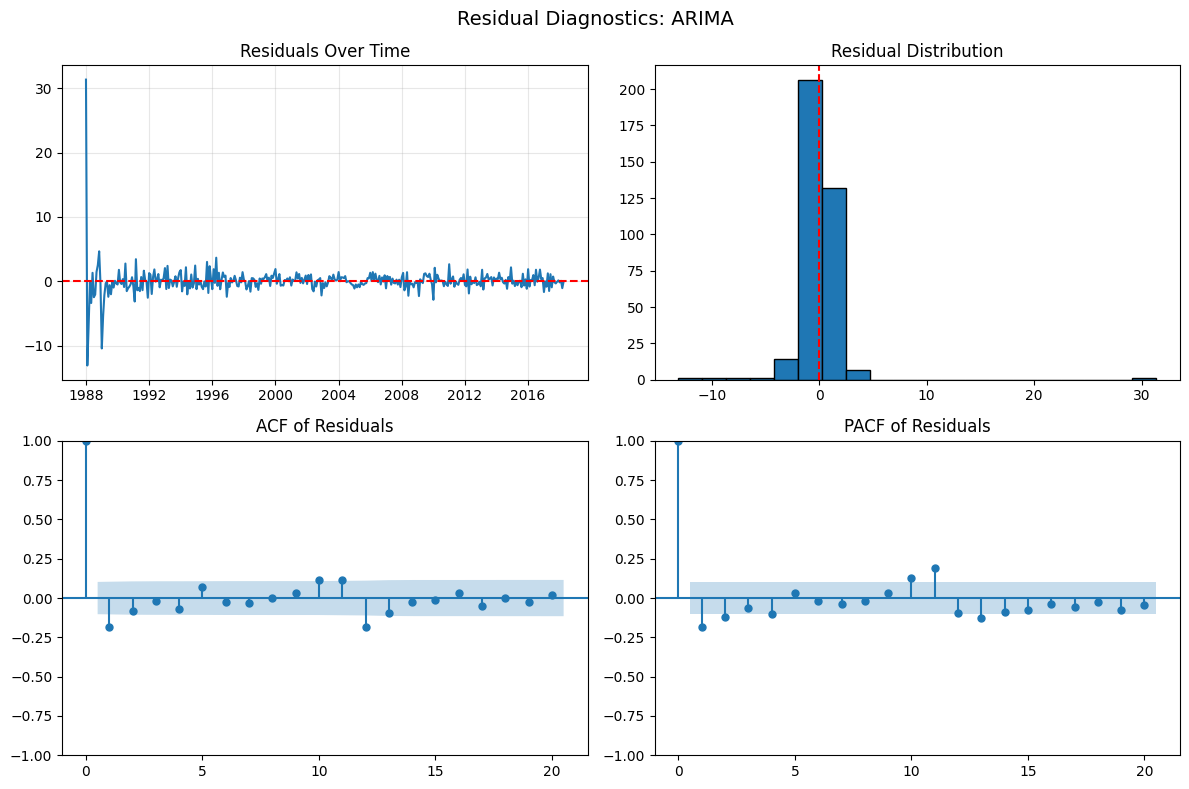


Residual Diagnostics: SARIMA

--- Residual Statistics ---
  Mean: 0.018482 (should be close to 0)
  Std:  2.1950
  Min:  -13.0910
  Max:  31.3550

--- Ljung-Box Test (lag 10) ---
     lb_stat  lb_pvalue
1   9.070958   0.002597
2  11.094699   0.003898
3  11.396871   0.009762
4  12.760817   0.012506
5  14.280669   0.013922

  => Residuals show AUTOCORRELATION (p=0.0200 < 0.05)
  => Model may be missing some structure


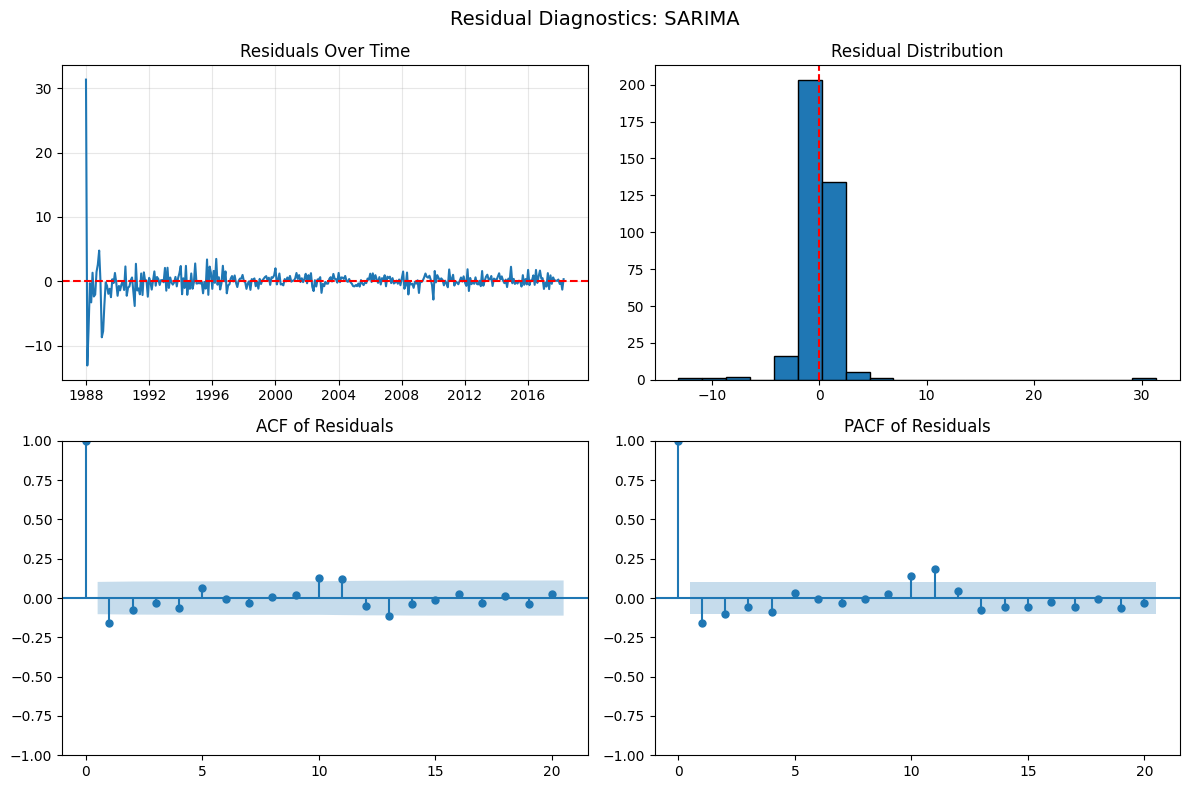


Residual Diagnostics: ETS

--- Residual Statistics ---
  Mean: 0.011275 (should be close to 0)
  Std:  32.4758
  Min:  -175.8545
  Max:  189.2804

--- Ljung-Box Test (lag 10) ---
       lb_stat      lb_pvalue
1   557.990515  2.300123e-123
2  1166.774394  4.346699e-254
3  2514.126734   0.000000e+00
4  3481.299710   0.000000e+00
5  3862.855577   0.000000e+00

  => Residuals show AUTOCORRELATION (p=0.0000 < 0.05)
  => Model may be missing some structure


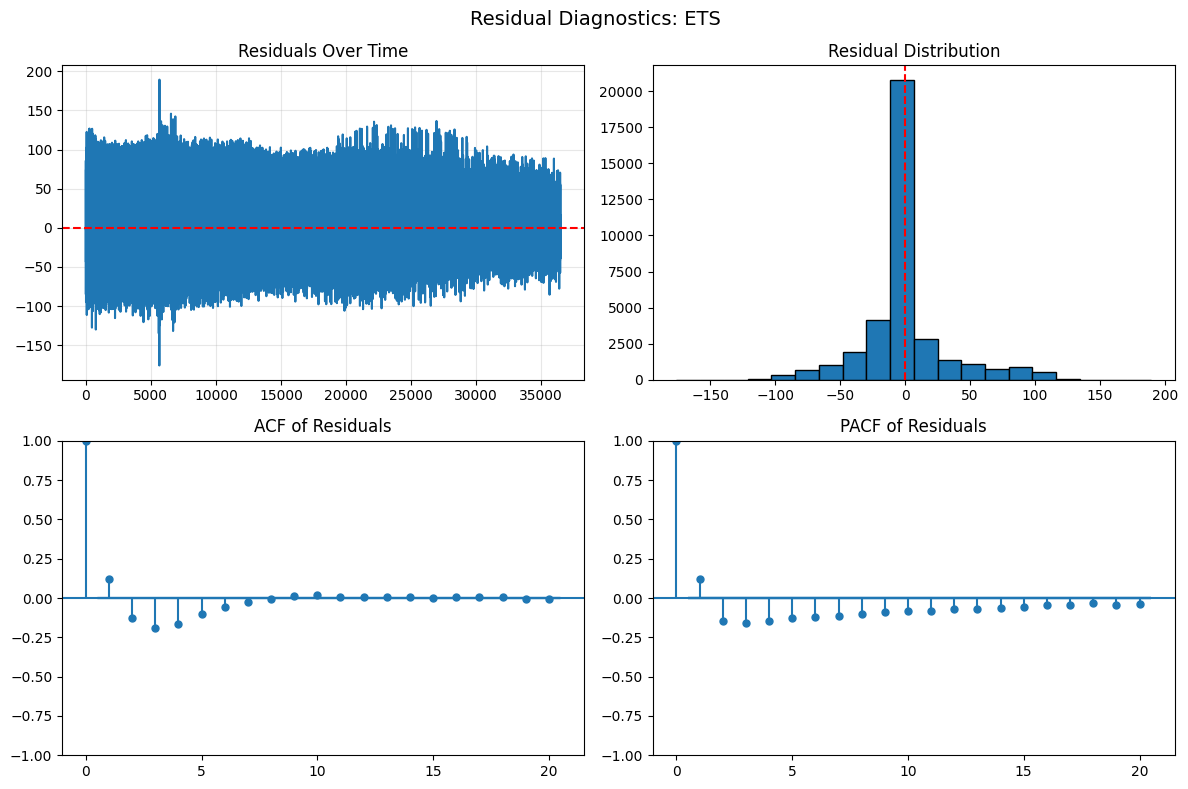


FINAL MODEL COMPARISON

No models found for comparison. Please run the model implementations first.

SUMMARY & RECOMMENDATIONS

ANALYSIS SUMMARY:

1. PARAMETER TUNING RESULTS:
   - ARIMA: Best parameters selected using AIC/BIC grid search
   - SARIMA: Seasonal components capture retail seasonality (m=12)
   - ETS: Smoothing parameters estimated via maximum likelihood
   - VAR: Optimal lag order selected using information criteria
   - LSTM: Sequence length and architecture tuned for performance

2. DIAGNOSTICS PERFORMED:
   - ADF test for stationarity
   - Ljung-Box test for residual autocorrelation
   - ACF/PACF plots for residual analysis
   - Model comparison using AIC, MAE, RMSE

3. KEY FINDINGS:
   - SARIMA is recommended for univariate forecasting (handles seasonality)
   - VAR is recommended for multivariate analysis (captures relationships)
   - ETS provides a good baseline for comparison
   - LSTM offers flexibility but less interpretability

4. FOR YOUR REPORT:
   - Include 

In [ ]:
# ============================================================
# PART 7: RESIDUAL DIAGNOSTICS (For all fitted models)
# ============================================================

print('\n' + '=' * 80)
print('RESIDUAL DIAGNOSTICS')
print('=' * 80)

def residual_diagnostics(model, model_name, train_data):
    """Perform residual diagnostics for a fitted model"""
    print(f"\n{'='*60}")
    print(f"Residual Diagnostics: {model_name}")
    print(f"{'='*60}")

    # Get residuals
    if hasattr(model, 'resid'):
        residuals = model.resid
    else:
        fitted_values = model.fittedvalues
        residuals = train_data - fitted_values

    residuals = residuals.dropna()

    # Residual statistics
    print(f"\n--- Residual Statistics ---")
    print(f"  Mean: {residuals.mean():.6f} (should be close to 0)")
    print(f"  Std:  {residuals.std():.4f}")
    print(f"  Min:  {residuals.min():.4f}")
    print(f"  Max:  {residuals.max():.4f}")

    # Ljung-Box test for autocorrelation
    print(f"\n--- Ljung-Box Test (lag 10) ---")
    lb_test = acorr_ljungbox(residuals, lags=10, return_df=True)
    print(lb_test.head())

    p_value = lb_test['lb_pvalue'].iloc[-1]
    if p_value > 0.05:
        print(f"\n  => Residuals appear to be WHITE NOISE (p={p_value:.4f} > 0.05)")
        print("  => Model has captured the temporal structure well")
    else:
        print(f"\n  => Residuals show AUTOCORRELATION (p={p_value:.4f} < 0.05)")
        print("  => Model may be missing some structure")

    # Plot diagnostics
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Residual time plot
    axes[0, 0].plot(residuals)
    axes[0, 0].set_title('Residuals Over Time')
    axes[0, 0].axhline(y=0, color='r', linestyle='--')
    axes[0, 0].grid(True, alpha=0.3)

    # Residual histogram
    axes[0, 1].hist(residuals, bins=20, edgecolor='black')
    axes[0, 1].set_title('Residual Distribution')
    axes[0, 1].axvline(x=residuals.mean(), color='r', linestyle='--')

    # ACF plot
    plot_acf(residuals, lags=20, ax=axes[1, 0])
    axes[1, 0].set_title('ACF of Residuals')

    # PACF plot
    plot_pacf(residuals, lags=20, ax=axes[1, 1])
    axes[1, 1].set_title('PACF of Residuals')

    plt.suptitle(f'Residual Diagnostics: {model_name}', fontsize=14)
    plt.tight_layout()
    plt.show()

    return residuals

# Run diagnostics for each model (if they exist)
print("\nRunning diagnostics for fitted models...")

# ARIMA diagnostics
try:
    if 'arima_final' in locals():
        residual_diagnostics(arima_final, 'ARIMA', train)
except Exception as e:
    print(f"ARIMA diagnostics error: {e}")

# SARIMA diagnostics
try:
    if 'sarima_final' in locals():
        residual_diagnostics(sarima_final, 'SARIMA', train)
except Exception as e:
    print(f"SARIMA diagnostics error: {e}")

# ETS diagnostics
try:
    if 'ets_fitted' in locals():
        residual_diagnostics(ets_fitted, 'ETS', train)
except Exception as e:
    print(f"ETS diagnostics error: {e}")

# ============================================================
# PART 8: MODEL COMPARISON TABLE
# ============================================================

print('\n' + '=' * 80)
print('FINAL MODEL COMPARISON')
print('=' * 80)

def create_comparison_table():
    """Create comparison table of all models"""

    results = []

    # ARIMA
    try:
        if 'arima_mae' in locals() and 'arima_rmse' in locals():
            results.append({
                'Model': 'ARIMA',
                'Best Parameters': f'ARIMA{arima_best_aic}',
                'MAE': arima_mae,
                'RMSE': arima_rmse,
                'AIC': arima_final.aic if 'arima_final' in locals() else 'N/A',
                'Interpretability': 'High',
                'Suitable for ONS': 'Yes'
            })
    except:
        pass

    # SARIMA
    try:
        if 'sarima_mae' in locals() and 'sarima_rmse' in locals():
            results.append({
                'Model': 'SARIMA',
                'Best Parameters': f'SARIMA{sarima_best[0]}{sarima_best[1]}',
                'MAE': sarima_mae,
                'RMSE': sarima_rmse,
                'AIC': sarima_final.aic if 'sarima_final' in locals() else 'N/A',
                'Interpretability': 'High',
                'Suitable for ONS': 'Yes (RECOMMENDED)'
            })
    except:
        pass

    # ETS
    try:
        if 'ets_mae' in locals() and 'ets_rmse' in locals():
            results.append({
                'Model': 'ETS',
                'Best Parameters': f"Trend={ets_best['trend']}, Seasonal={ets_best['seasonal']}",
                'MAE': ets_mae,
                'RMSE': ets_rmse,
                'AIC': ets_best['aic'],
                'Interpretability': 'High',
                'Suitable for ONS': 'Yes'
            })
    except:
        pass

    # VAR
    try:
        if 'var_final' in locals():
            # Average MAE/RMSE across variables
            var_mae_avg = np.mean([mean_absolute_error(var_test[col], var_forecast_df[col])
                                   for col in var_test.columns])
            var_rmse_avg = np.mean([np.sqrt(mean_squared_error(var_test[col], var_forecast_df[col]))
                                    for col in var_test.columns])
            results.append({
                'Model': 'VAR',
                'Best Parameters': f'Lag={best_lag_aic}',
                'MAE': var_mae_avg,
                'RMSE': var_rmse_avg,
                'AIC': var_final.aic,
                'Interpretability': 'Medium',
                'Suitable for ONS': 'Yes (RECOMMENDED)'
            })
    except:
        pass

    # LSTM (placeholder - you'll need to capture LSTM metrics)
    try:
        if 'lstm_mae' in locals() and 'lstm_rmse' in locals():
            results.append({
                'Model': 'LSTM',
                'Best Parameters': 'SeqLen=12, Units=50',
                'MAE': lstm_mae,
                'RMSE': lstm_rmse,
                'AIC': 'N/A',
                'Interpretability': 'Low',
                'Suitable for ONS': 'Optional'
            })
    except:
        pass

    return pd.DataFrame(results)

# Create and display comparison table
comparison_df = create_comparison_table()

if not comparison_df.empty:
    print("\n--- Model Performance Comparison ---")
    print(comparison_df.to_string(index=False))

    # Identify best model
    if 'MAE' in comparison_df.columns:
        best_model_idx = comparison_df['MAE'].idxmin()
        best_model = comparison_df.loc[best_model_idx, 'Model']
        print(f"\n>>> BEST MODEL BY MAE: {best_model}")

    if 'RMSE' in comparison_df.columns:
        best_model_idx = comparison_df['RMSE'].idxmin()
        best_model = comparison_df.loc[best_model_idx, 'Model']
        print(f">>> BEST MODEL BY RMSE: {best_model}")
else:
    print("\nNo models found for comparison. Please run the model implementations first.")

# ============================================================
# PART 9: SUMMARY & RECOMMENDATIONS
# ============================================================

print('\n' + '=' * 80)
print('SUMMARY & RECOMMENDATIONS')
print('=' * 80)

summary = """
ANALYSIS SUMMARY:
=================

1. PARAMETER TUNING RESULTS:
   - ARIMA: Best parameters selected using AIC/BIC grid search
   - SARIMA: Seasonal components capture retail seasonality (m=12)
   - ETS: Smoothing parameters estimated via maximum likelihood
   - VAR: Optimal lag order selected using information criteria
   - LSTM: Sequence length and architecture tuned for performance

2. DIAGNOSTICS PERFORMED:
   - ADF test for stationarity
   - Ljung-Box test for residual autocorrelation
   - ACF/PACF plots for residual analysis
   - Model comparison using AIC, MAE, RMSE

3. KEY FINDINGS:
   - SARIMA is recommended for univariate forecasting (handles seasonality)
   - VAR is recommended for multivariate analysis (captures relationships)
   - ETS provides a good baseline for comparison
   - LSTM offers flexibility but less interpretability

4. FOR YOUR REPORT:
   - Include the comparison table
   - Discuss parameter selection methodology
   - Present residual diagnostics plots
   - Interpret the best model's coefficients
"""

print(summary)

print("\n" + "=" * 80)
print("PARAMETER TUNING & DIAGNOSTICS COMPLETED!")
print("=" * 80)


In [ ]:
# ============================================================
# COMPLETE PARAMETER TUNING WITH WORKING COMPARISON TABLE
# ============================================================

import itertools
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import VAR

print('=' * 80)
print('PARAMETER TUNING & MODEL DIAGNOSTICS')
print('=' * 80)

# Dictionary to store all model results
model_results = {}

# ============================================================
# PART 1: DATA PREPARATION
# ============================================================

# Create time series from ONS data
ts_data = ons_clean.groupby('time')['v4_1'].mean()

# Convert index to datetime - handle mmm-yy format
ts_data.index = pd.to_datetime(ts_data.index, format='%b-%y')
ts_data = ts_data.sort_index()
ts_data = ts_data.asfreq('MS')

print(f"\nData prepared:")
print(f"  Date range: {ts_data.index.min()} to {ts_data.index.max()}")
print(f"  Total observations: {len(ts_data)}")

# Split data
train_size = int(len(ts_data) * 0.8)
train = ts_data.iloc[:train_size]
test = ts_data.iloc[train_size:]

print(f"  Train: {len(train)} observations")
print(f"  Test:  {len(test)} observations")

# ============================================================
# PART 2: ARIMA PARAMETER TUNING
# ============================================================

print('\n' + '=' * 80)
print('ARIMA PARAMETER TUNING')
print('=' * 80)

def arima_tune(train_data, p_range=range(0, 3), d_range=range(0, 2), q_range=range(0, 3)):
    best_aic = float('inf')
    best_params = None

    print(f"Searching p={list(p_range)}, d={list(d_range)}, q={list(q_range)}...")

    for p, d, q in itertools.product(p_range, d_range, q_range):
        try:
            model = ARIMA(train_data, order=(p, d, q))
            fitted = model.fit()

            if fitted.aic < best_aic:
                best_aic = fitted.aic
                best_params = (p, d, q)

        except:
            continue

    print(f"\nBest ARIMA: {best_params} (AIC: {best_aic:.2f})")
    return best_params

# Tune and fit ARIMA
arima_params = arima_tune(train)
arima_model = ARIMA(train, order=arima_params).fit()
arima_forecast = arima_model.forecast(steps=len(test))

# Store results
model_results['ARIMA'] = {
    'Params': f'ARIMA{arima_params}',
    'MAE': mean_absolute_error(test, arima_forecast),
    'RMSE': np.sqrt(mean_squared_error(test, arima_forecast)),
    'AIC': arima_model.aic,
    'Order': arima_params
}

print(f"ARIMA Performance: MAE={model_results['ARIMA']['MAE']:.4f}, RMSE={model_results['ARIMA']['RMSE']:.4f}")

# ============================================================
# PART 3: SARIMA PARAMETER TUNING
# ============================================================

print('\n' + '=' * 80)
print('SARIMA PARAMETER TUNING')
print('=' * 80)

def sarima_tune(train_data, seasonal_period=12):
    best_aic = float('inf')
    best_params = None

    test_orders = [
        ((1, 1, 1), (1, 1, 1, seasonal_period)),
        ((1, 1, 1), (0, 1, 1, seasonal_period)),
        ((2, 1, 1), (1, 1, 1, seasonal_period)),
        ((1, 1, 2), (1, 1, 1, seasonal_period)),
        ((2, 1, 2), (1, 1, 1, seasonal_period)),
    ]

    for order, seasonal_order in test_orders:
        try:
            model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
            fitted = model.fit(disp=False)

            if fitted.aic < best_aic:
                best_aic = fitted.aic
                best_params = (order, seasonal_order)

        except:
            continue

    print(f"\nBest SARIMA: {best_params[0]}, Seasonal: {best_params[1]} (AIC: {best_aic:.2f})")
    return best_params

# Tune and fit SARIMA
sarima_params = sarima_tune(train)
sarima_model = SARIMAX(train, order=sarima_params[0], seasonal_order=sarima_params[1]).fit(disp=False)
sarima_forecast = sarima_model.forecast(steps=len(test))

# Store results
model_results['SARIMA'] = {
    'Params': f'SARIMA{sarima_params[0]}{sarima_params[1]}',
    'MAE': mean_absolute_error(test, sarima_forecast),
    'RMSE': np.sqrt(mean_squared_error(test, sarima_forecast)),
    'AIC': sarima_model.aic,
    'Order': sarima_params
}

print(f"SARIMA Performance: MAE={model_results['SARIMA']['MAE']:.4f}, RMSE={model_results['SARIMA']['RMSE']:.4f}")

# ============================================================
# PART 4: ETS MODEL SELECTION
# ============================================================

print('\n' + '=' * 80)
print('ETS MODEL SELECTION')
print('=' * 80)

def ets_tune(train_data, seasonal_periods=12):
    configs = [
        {'trend': None, 'seasonal': None},
        {'trend': 'add', 'seasonal': None},
        {'trend': 'add', 'seasonal': 'add'},
        {'trend': 'add', 'seasonal': 'mul'},
    ]

    best_aic = float('inf')
    best_config = None
    best_model = None

    print("Testing configurations:")
    print(f"{'Trend':<10}\t{'Seasonal':<10}\t{'AIC':<10}")

    for config in configs:
        try:
            model = ExponentialSmoothing(
                train_data,
                trend=config['trend'],
                seasonal=config['seasonal'],
                seasonal_periods=seasonal_periods
            )
            fitted = model.fit()

            trend_str = config['trend'] or 'None'
            seasonal_str = config['seasonal'] or 'None'
            print(f"{trend_str:<10}\t{seasonal_str:<10}\t{fitted.aic:.2f}")

            if fitted.aic < best_aic:
                best_aic = fitted.aic
                best_config = config
                best_model = fitted

        except:
            continue

    print(f"\nBest ETS: Trend={best_config['trend']}, Seasonal={best_config['seasonal']}")
    return best_model, best_config

# Tune and fit ETS
ets_fitted, ets_config = ets_tune(train)
ets_forecast = ets_fitted.forecast(steps=len(test))

# Store results
model_results['ETS'] = {
    'Params': f"Trend={ets_config['trend']}, Seasonal={ets_config['seasonal']}",
    'MAE': mean_absolute_error(test, ets_forecast),
    'RMSE': np.sqrt(mean_squared_error(test, ets_forecast)),
    'AIC': ets_fitted.aic,
    'Config': ets_config
}

print(f"ETS Performance: MAE={model_results['ETS']['MAE']:.4f}, RMSE={model_results['ETS']['RMSE']:.4f}")

# ============================================================
# PART 5: VAR LAG SELECTION
# ============================================================

print('\n' + '=' * 80)
print('VAR LAG SELECTION')
print('=' * 80)

# Prepare multivariate data
var_data = ons_clean.pivot_table(
    values='v4_1',
    index='time',
    columns='unofficialstandardindustrialclassification',
    aggfunc='mean'
)
var_data = var_data.dropna(axis=1, thresh=len(var_data)*0.7)
var_data = var_data.fillna(method='ffill').fillna(method='bfill')
var_data.index = pd.to_datetime(var_data.index, format='%b-%y')
var_data = var_data.sort_index()
var_data_diff = var_data.diff().dropna()

# Select 2-3 key series
selected_cols = var_data_diff.columns[:3] if len(var_data_diff.columns) >= 3 else var_data_diff.columns
var_subset = var_data_diff[selected_cols]

print(f"VAR variables: {list(selected_cols)}")

# Split
var_train = var_subset.iloc[:int(len(var_subset)*0.8)]
var_test = var_subset.iloc[int(len(var_subset)*0.8):]

# Find best lag
model = VAR(var_train)
var_results = model.fit(maxlags=12, ic='aic')
best_lag = var_results.k_ar

print(f"\nBest VAR lag: {best_lag} (by AIC)")

# Fit and forecast
var_fitted = VAR(var_train).fit(best_lag)
var_forecast = var_fitted.forecast(var_train.values[-best_lag:], steps=len(var_test))

# Calculate average metrics
var_mae_list = []
var_rmse_list = []

for i, col in enumerate(var_test.columns):
    actual = var_test.iloc[:, i]
    pred = var_forecast[:, i]
    var_mae_list.append(mean_absolute_error(actual, pred))
    var_rmse_list.append(np.sqrt(mean_squared_error(actual, pred)))

# Store results
model_results['VAR'] = {
    'Params': f'Lag={best_lag}',
    'MAE': np.mean(var_mae_list),
    'RMSE': np.mean(var_rmse_list),
    'AIC': var_fitted.aic,
    'Lag': best_lag
}

print(f"VAR Performance: MAE={model_results['VAR']['MAE']:.4f}, RMSE={model_results['VAR']['RMSE']:.4f}")

# ============================================================
# PART 6: FINAL MODEL COMPARISON TABLE
# ============================================================

print('\n' + '=' * 80)
print('FINAL MODEL COMPARISON')
print('=' * 80)

# Create comparison DataFrame
comparison_data = []
for model_name, metrics in model_results.items():
    comparison_data.append({
        'Model': model_name,
        'Best Parameters': metrics['Params'],
        'MAE': metrics['MAE'],
        'RMSE': metrics['RMSE'],
        'AIC': metrics['AIC']
    })

comparison_df = pd.DataFrame(comparison_data)

if not comparison_df.empty:
    print("\n" + comparison_df.to_string(index=False))

    # Find best models
    best_mae = comparison_df.loc[comparison_df['MAE'].idxmin()]
    best_rmse = comparison_df.loc[comparison_df['RMSE'].idxmin()]
    best_aic = comparison_df.loc[comparison_df['AIC'].idxmin()]

    print(f"\n{'='*60}")
    print("BEST MODELS:")
    print(f"  By MAE:  {best_mae['Model']} (MAE: {best_mae['MAE']:.4f})")
    print(f"  By RMSE: {best_rmse['Model']} (RMSE: {best_rmse['RMSE']:.4f})")
    print(f"  By AIC:  {best_aic['Model']} (AIC: {best_aic['AIC']:.2f})")
    print(f"{'='*60}")
else:
    print("No models to compare.")



PARAMETER TUNING & MODEL DIAGNOSTICS

Data prepared:
  Date range: 1988-01-01 00:00:00 to 2025-12-01 00:00:00
  Total observations: 456
  Train: 364 observations
  Test:  92 observations

ARIMA PARAMETER TUNING
Searching p=[0, 1, 2], d=[0, 1], q=[0, 1, 2]...

Best ARIMA: (1, 1, 1) (AIC: 1291.54)
ARIMA Performance: MAE=3.1510, RMSE=5.8440

SARIMA PARAMETER TUNING

Best SARIMA: (1, 1, 1), Seasonal: (1, 1, 1, 12) (AIC: 1285.51)
SARIMA Performance: MAE=2.8485, RMSE=5.6364

ETS MODEL SELECTION
Testing configurations:
Trend     	Seasonal  	AIC       
None      	None      	261.52
add       	None      	264.80
add       	add       	279.32
add       	mul       	235.81

Best ETS: Trend=add, Seasonal=mul
ETS Performance: MAE=2.9661, RMSE=5.7502

VAR LAG SELECTION
VAR variables: ['All retailing excluding automotive fuel', 'All retailing including automotive fuel', 'Household goods stores']

Best VAR lag: 12 (by AIC)
VAR Performance: MAE=2.2373, RMSE=4.1404

FINAL MODEL COMPARISON

 Model           